# Assignment 2

This assignment serves as a comprehensive evaluation of your machine learning skills, encompassing not only the technical aspects of model development but also your ability to analyze, interpret, and present data insights effectively. As such, it's essential to ensure that your submission is complete, functional, and devoid of any obvious gaps, as if you were delivering this project to a client.

To achieve this, leverage the full capabilities of Markdown and the interactive visualization tools available in Jupyter notebooks to craft a well-structured and visually appealing report of your findings. Your report should clearly communicate the insights you've gained from the exploratory data analysis, the rationale behind your data preprocessing and feature engineering decisions, and a thorough analysis of feature importance. High-quality visualizations and well-organized documentation will not only support your analysis but also make your results more accessible and understandable to your audience.

Remember, the ability to present complex results in an intuitive and engaging manner is a crucial skill, almost as important as the technical proficiency in model building and data analysis. Treat this assignment as an opportunity to showcase your skills in both areas.

## Instructions
- Your submission should be a `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. It should include the answers to the questions in markdown cells, your data analysis and results.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell. [Academic misconduct policy](https://wiki.innopolis.university/display/DOE/Academic+misconduct+policy)
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions and decisions.

## Self-Reliance and Exploration
In this task, you're encouraged to rely on your resourcefulness and creativity. Dive into available resources, experiment with various solutions, and learn from every outcome. While our team is here to clarify task details and offer conceptual guidance, we encourage you to first seek answers independently. This approach is vital for developing your problem-solving skills in machine learning.



# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (50%)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more about Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/)


## What You Need to Do
In this task, you are required to employ a fully connected feed-forward Artificial Neural Network (ANN) to tackle a classification problem. This involves several key steps, each critical to the development and performance of your model:

- **Exploratory Data Analysis (EDA) (10%)**: Begin by conducting a thorough exploratory analysis of the provided dataset. Your goal here is to uncover patterns, anomalies, relationships, or trends that could influence your modeling decisions. **Share the insights** you gather from this process and explain how they informed your subsequent steps.
  
- **Data Preprocessing and Feature Engineering (10%)**: Based on your EDA insights, choose and implement the most appropriate data preprocessing steps and feature engineering techniques. This may include handling missing values, encoding categorical variables, normalizing data, and creating new features that could enhance your model's ability to learn from the data.
  
- **Model Design and Training (10%)**: Design a fully connected feed-forward ANN model. You will need to experiment with different architectures, layer configurations, and hyperparameters to find the most effective solution for the classification problem at hand.

- **Feature Importance Analysis (10%)**: After developing your model, analyze which features are most important for making predictions. Discuss how this analysis aligns with your initial EDA insights and what it reveals about the characteristics most indicative of specific user behaviors or identities.

- **Evaluation (10%)**: You will be required to submit your model prediction on a hidden data set.

### Data
You will be using the data in `Task_1.json` to identify Waldo (`user_id=0`). The dataset includes:
- **"browser", "os" and "locale"**: Information about the software used.
- **"user_id"**: A unique identifier for each user.
- **"location"**: Geolocation based on the IP address used.
- **"sites"**: A list of visited URLs and the time spent there in seconds.
- **"time" and "date"**: When the session started in GMT.


### Evaluation
After training, evaluate your model by printing the classification report on your test set. Then, predict whether each user in `task_1_verify.json` is Waldo or not, by adding the boolean `is_waldo` property to the `task_1_verify.json`:

```diff
  [
    {
+     "is_waldo": false,
      "browser": "Chrome",
      "os": "Debian",
      "locale": "ur-PK",
      "location": "Russia/Moscow",
      "sites": [
          // ...
      ],
      "time": "04:12:00",
      "date":"2017-06-29"
    }
    // ...
  ]

```

## Learning Objectives

- **Exploratory Data Analysis**: Apply suitable analysis techniques to gain insights and better understand the dataset.
- **Classification Approach**: Identify the most appropriate method for the given problem.
- **Data Preprocessing**: Select and execute proper preprocessing and encoding techniques.
- **Model Implementation**: Utilize ANNs to address a classification problem, including training, validation, and testing phases.
- **Feature Importance Analysis**: Determine and report which features are most critical for the model's predictions to uncover insights into specific user behaviors.

## Exploratory Data Analysis (EDA)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the training data from JSON file into a Pandas DataFrame
data = pd.read_json('task_1_train_data.json')
data

,browser,os,locale,user_id,location,sites,time,date
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[{'site': 'bing.net', 'length': 52}, {'site': ...",04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[{'site': 'yahoo.com', 'length': 46}, {'site':...",03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[{'site': 'oracle.com', 'length': 335}]",05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[{'site': 'mail.google.com', 'length': 192}, {...",00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[{'site': 'mail.google.com', 'length': 266}, {...",22:55:00,2016-07-23
...,...,...,...,...,...,...,...,...
39995,Chrome,Windows 10,wo-SN,184,Malaysia/Kuala Lumpur,"[{'site': 'airbnb.com', 'length': 96}, {'site'...",06:45:00,2016-04-03
39996,Chrome,Windows 10,ru_RU,181,France/Paris,"[{'site': 'lenta.ru', 'length': 84}, {'site': ...",20:57:00,2016-12-28
39997,Safari,MacOS,en-GB,112,Australia/Sydney,"[{'site': 'toptal.com', 'length': 65}, {'site'...",04:12:00,2016-07-26
39998,Safari,MacOS,pt-BR,136,India/Delhi,"[{'site': 'yworks.com', 'length': 146}, {'site...",10:18:00,2017-01-01


In [3]:
# Display information about the data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   browser   40000 non-null  object        
 1   os        40000 non-null  object        
 2   locale    40000 non-null  object        
 3   user_id   40000 non-null  int64         
 4   location  40000 non-null  object        
 5   sites     40000 non-null  object        
 6   time      40000 non-null  object        
 7   date      40000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 2.4+ MB


In [4]:
# Get number of records for user_id = 0 (Waldo) and others
user_0_data = data[data['user_id'] == 0]
other_users_data = data[data['user_id'] != 0]

print("Number of records for user_id = 0 (Waldo):", len(user_0_data))
print("Number of records for user_id != 0 (Others):", len(other_users_data))

Number of records for user_id = 0 (Waldo): 200
Number of records for user_id != 0 (Others): 39800


The output reveals that the dataset is **imbalanced**, with only **200 records for Waldo** (*user_id = 0*) compared to **39,800 records for other users**.

Imbalanced datasets can pose challenges for classification models, as the model may be biased towards the majority class. **Handling imbalanced data will be crucial to get accurate performance in this task.**


In [5]:
# Unique values for categorical features
categorical_features = ['browser', 'os', 'locale', 'location']
for feature in categorical_features:
    unique_values = data[feature].unique()
    print(f"{len(unique_values)} unique values for feature '{feature}' : \n {unique_values}\n")

unique_sites = set([site_info['site'] for session in data['sites'] for site_info in session])
print(f"{len(unique_sites)} unique values for 'site'")

4 unique values for feature 'browser' : 
 ['Chrome' 'Firefox' 'Safari' 'Internet Explorer']

6 unique values for feature 'os' : 
 ['Debian' 'Windows 8' 'MacOS' 'Ubuntu' 'Windows 10' 'Windows 7']

25 unique values for feature 'locale' : 
 ['ur-PK' 'uk-UA' 'fr-FR' 'nl-NL' 'ro-RO' 'en-US' 'en-NZ' 'vi-VN' 'pt-BR'
 'es-MX' 'ja-JP' 'en-GB' 'en-SG' 'ru_RU' 'pt-PT' 'zh-CN' 'bg-BG' 'wo-SN'
 'de-DE' 'pl-PL' 'it-IT' 'xh-ZA' 'ru-RU' 'en-AU' 'en-CA']

21 unique values for feature 'location' : 
 ['Russia/Moscow' 'France/Paris' 'Japan/Tokyo' 'Australia/Sydney'
 'USA/San Francisco' 'Canada/Vancouver' 'UK/London' 'Canada/Toronto'
 'Malaysia/Kuala Lumpur' 'USA/Miami' 'Italy/Rome' 'Spain/Madrid'
 'USA/Chicago' 'Germany/Berlin' 'China/Shanghai' 'India/Delhi'
 'Brazil/Rio de Janeiro' 'Singapore/Singapore' 'Netherlands/Amsterdam'
 'USA/New York' 'New Zealand/Auckland']

11129 unique values for 'site'



For features like '**browser', 'os', 'locale' and 'location'**, which have a relatively small number of unique values, they can be easily encoded using one-hot encoding.

However, the **'site'** feature has a large number of unique values (11129 unique sites). Encoding it using one-hot encoding would result in a **very large and sparse data**, which can be computationally expensive and impractical. Therefore, other feature engineering approaches may be more suitable for handling this feature.


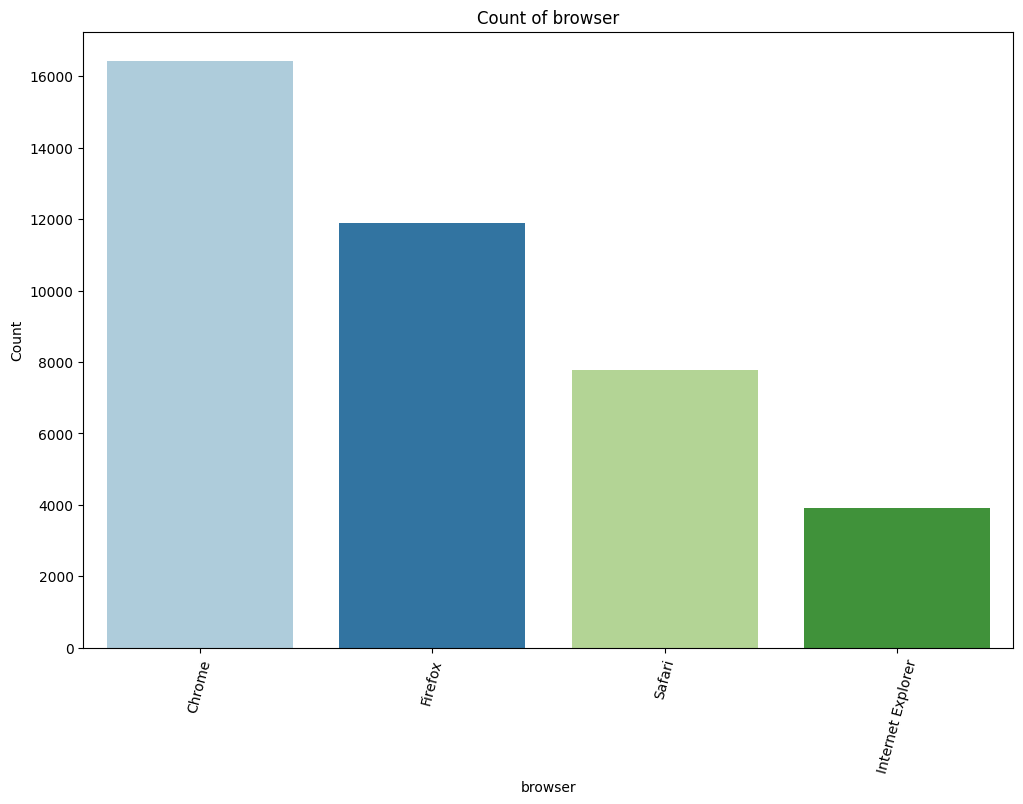

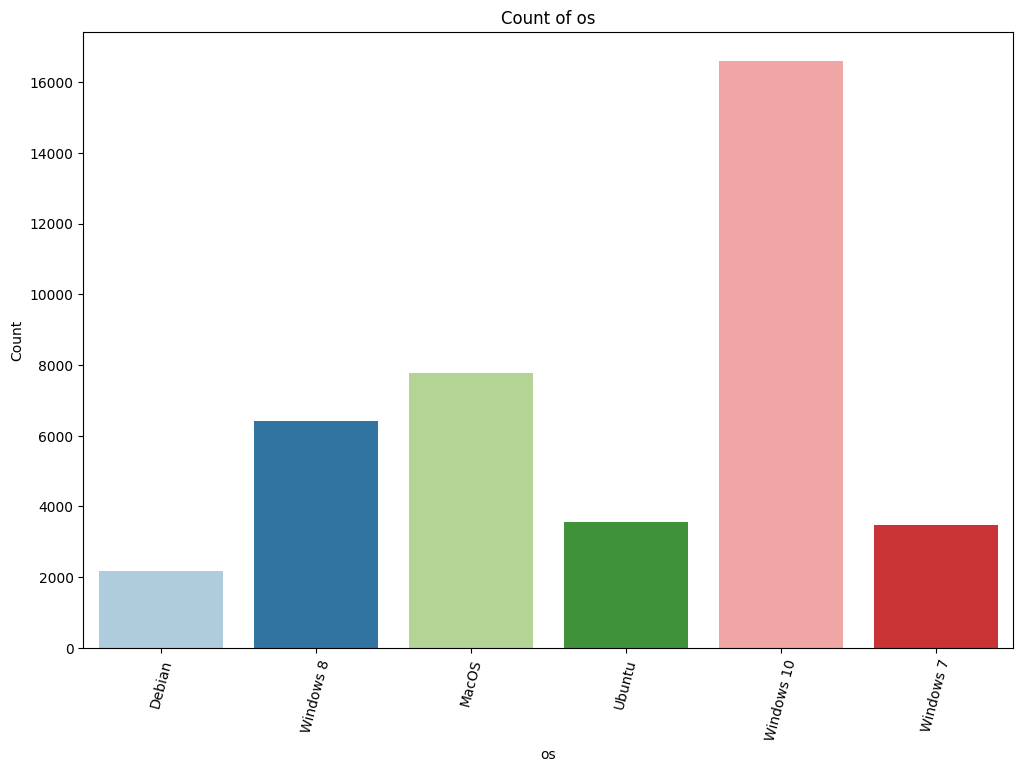

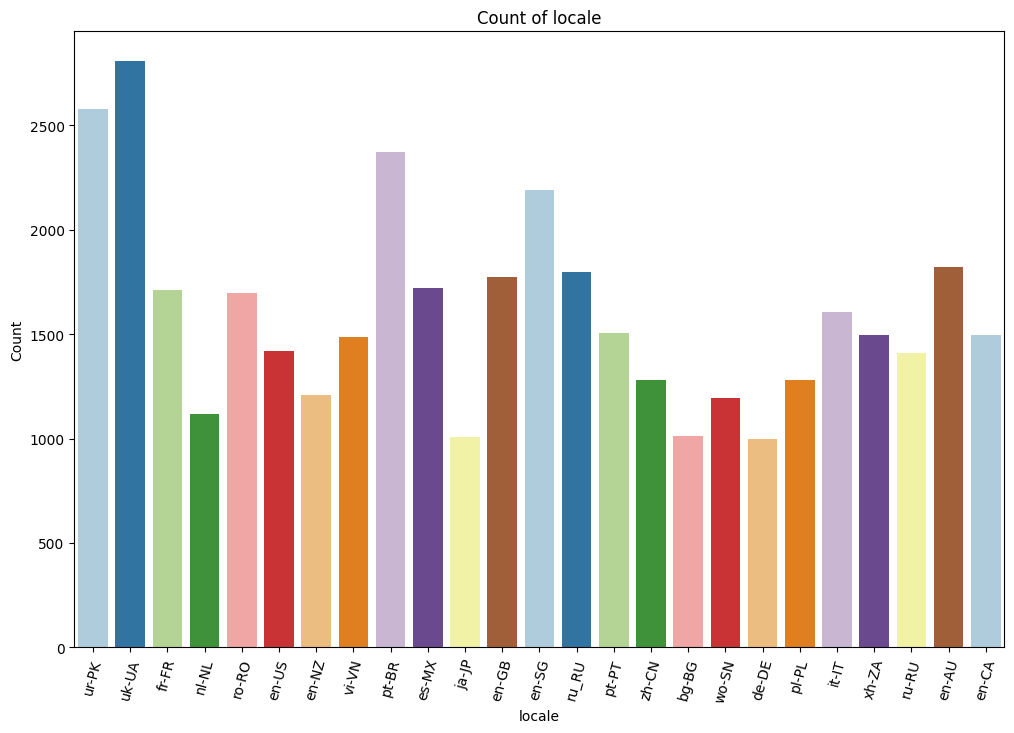

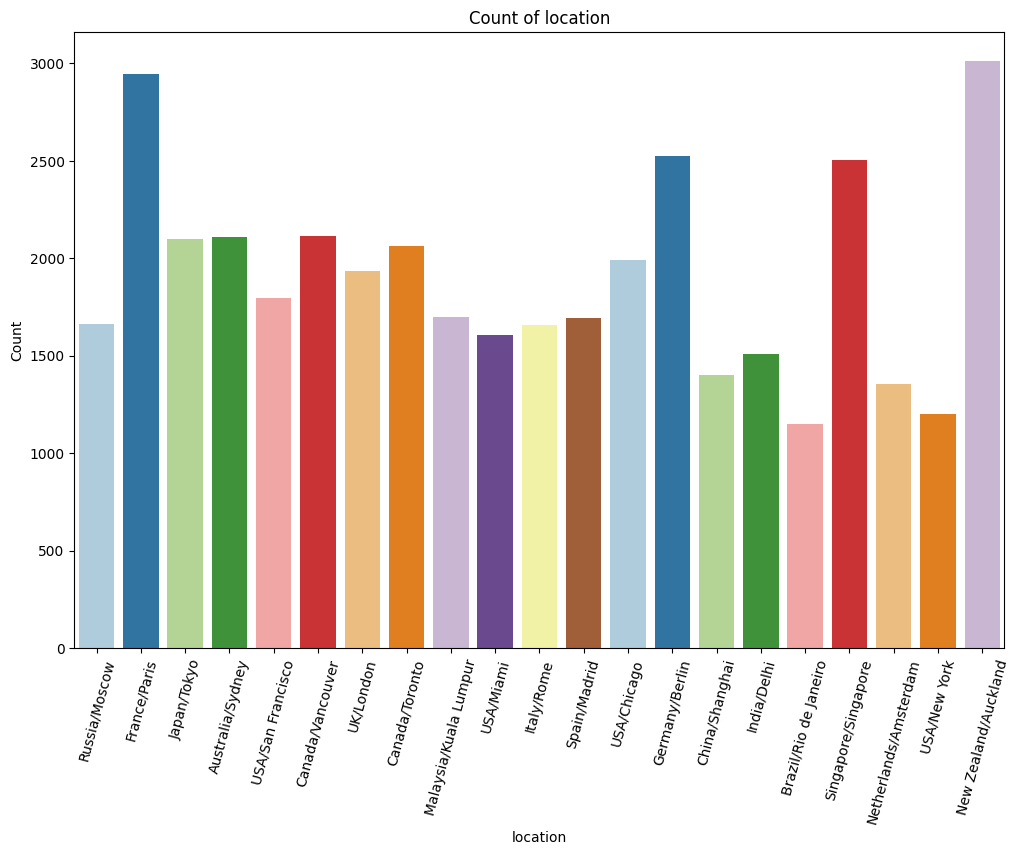

In [6]:
# Countplot for categorical features
for feature in categorical_features:
    palette = sns.color_palette("Paired", len(data[feature].unique()))
    plt.figure(figsize=(12 , 8))
    sns.countplot(data=data, x=feature, palette=palette, hue=feature, legend=False)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=75)
    plt.show()

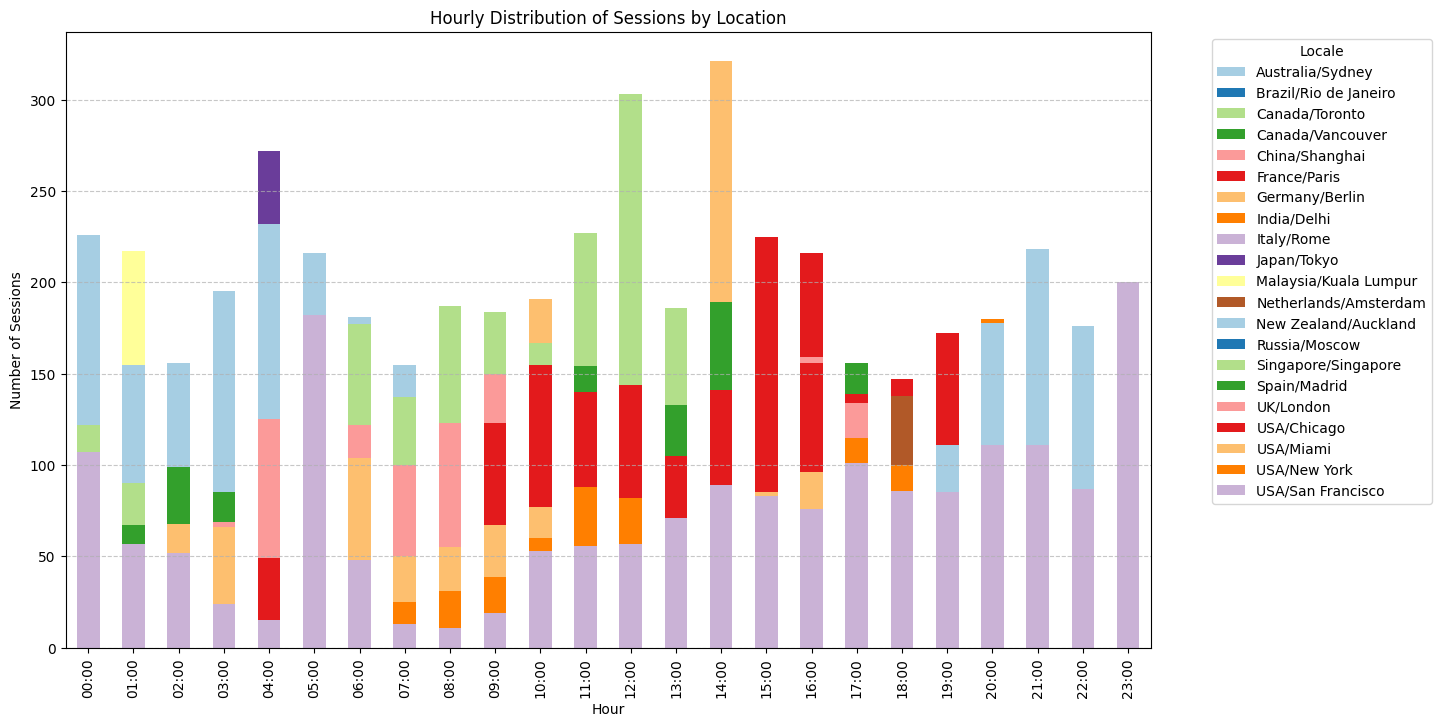

In [7]:
# Plot the hourly distribution of sessions for each locale
hourly_distribution_by_location = data.groupby([pd.to_datetime(data['time'], format='%H:%M:%S').dt.round('H').dt.strftime('%H:%M'), 'location']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
for col, color in zip(hourly_distribution_by_location.columns, palette):
    hourly_distribution_by_location[col].plot(kind='bar', stacked=True, color=color)
plt.title('Hourly Distribution of Sessions by Location')
plt.xlabel('Hour')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=90)
plt.legend(title='Locale', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

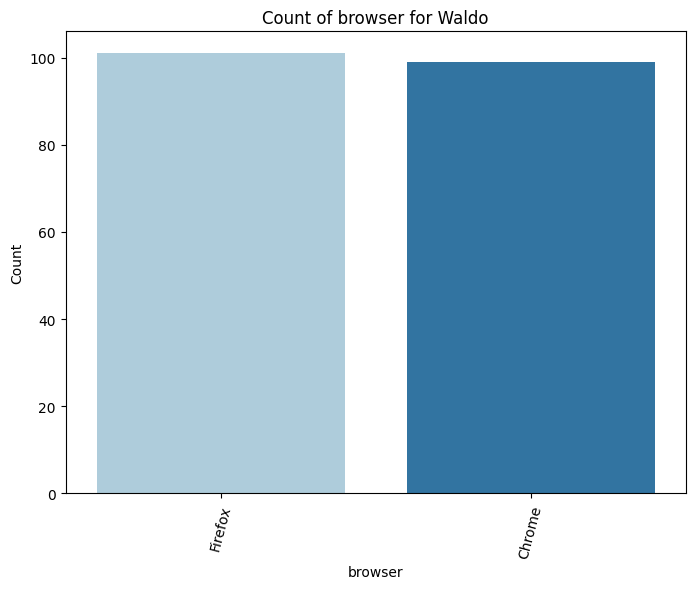

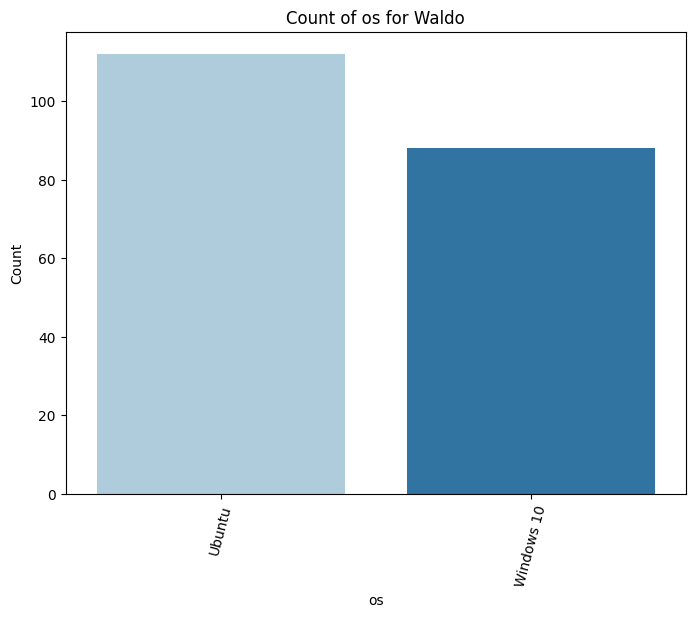

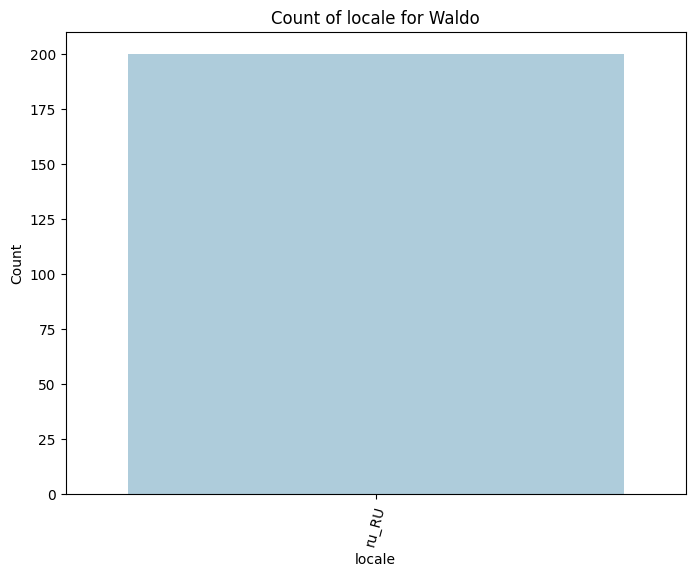

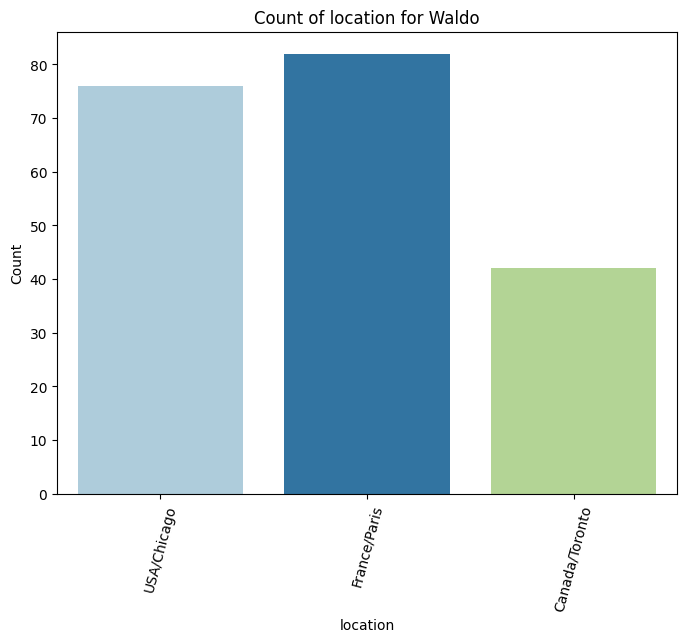

In [8]:
# Countplot for categorical features with different colors for each category for Waldo
for feature in categorical_features:
    palette = sns.color_palette("Paired", len(user_0_data[feature].unique()))
    plt.figure(figsize=(8, 6))
    sns.countplot(data=user_0_data, x=feature, palette=palette, hue=feature, legend=False)
    plt.title(f'Count of {feature} for Waldo')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=75)
    plt.show()


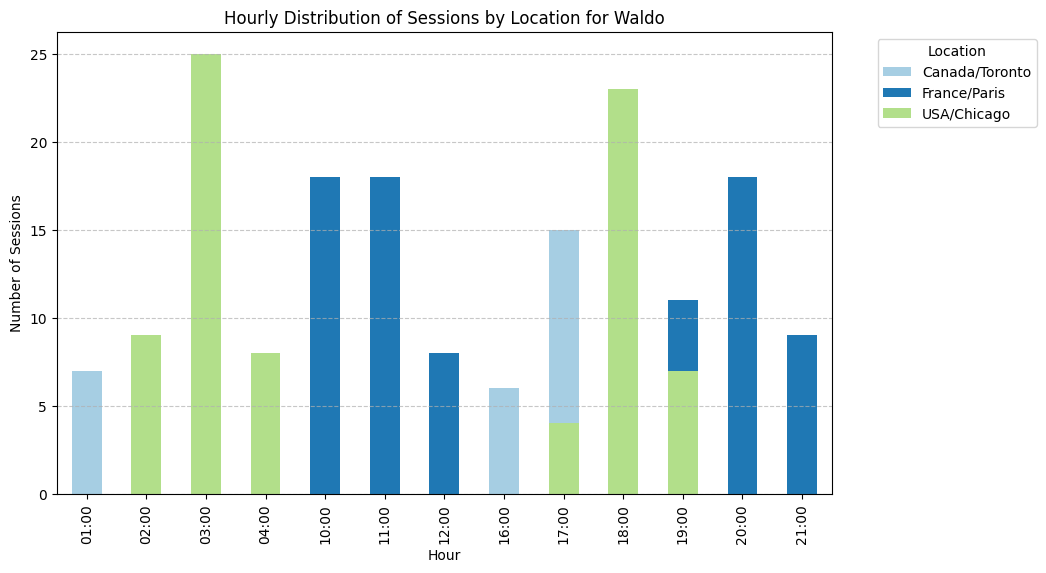

In [9]:
# Plot the hourly distribution of sessions for each locale for Waldo
hourly_distribution_by_locale = user_0_data.groupby([pd.to_datetime(user_0_data['time'], format='%H:%M:%S').dt.round('H').dt.strftime('%H:%M'), 'location']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
for col, color in zip(hourly_distribution_by_locale.columns, palette):
    hourly_distribution_by_locale[col].plot(kind='bar', stacked=True, color=color)
plt.title('Hourly Distribution of Sessions by Location for Waldo')
plt.xlabel('Hour')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=90)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


We're beginning to observe that Waldo differs from the rest.

The **locale** is likely to be good in identifying him. Moreover, factors such as **session time, location, operating system, and browser** usage should also be quite informative.


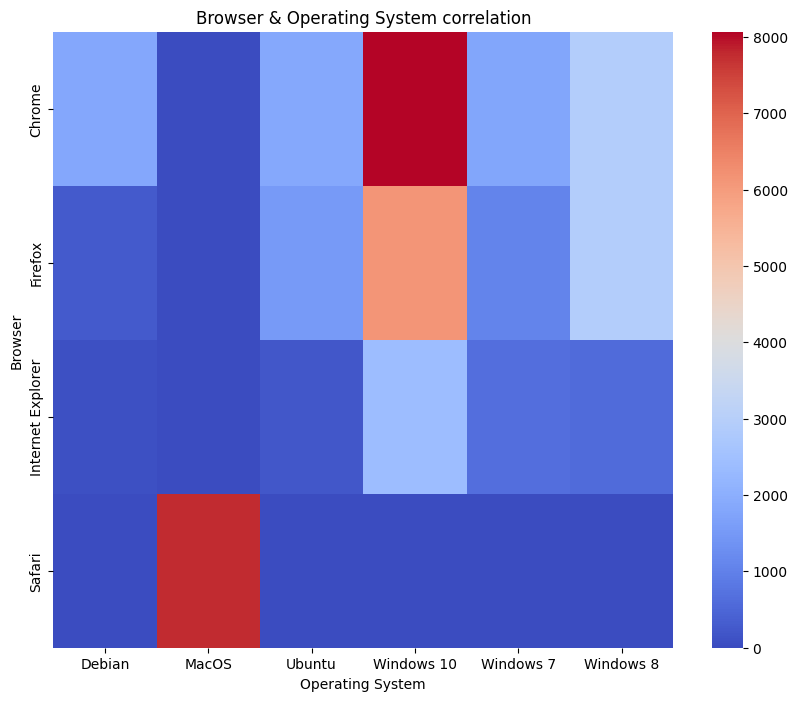

In [10]:
# Explore the correlation of operating system and browser
plt.figure(figsize=(10, 8))
heatmap_data = data.groupby(['browser', 'os']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap="coolwarm")
plt.xlabel('Operating System')
plt.ylabel('Browser')
plt.title('Browser & Operating System correlation')
plt.show()


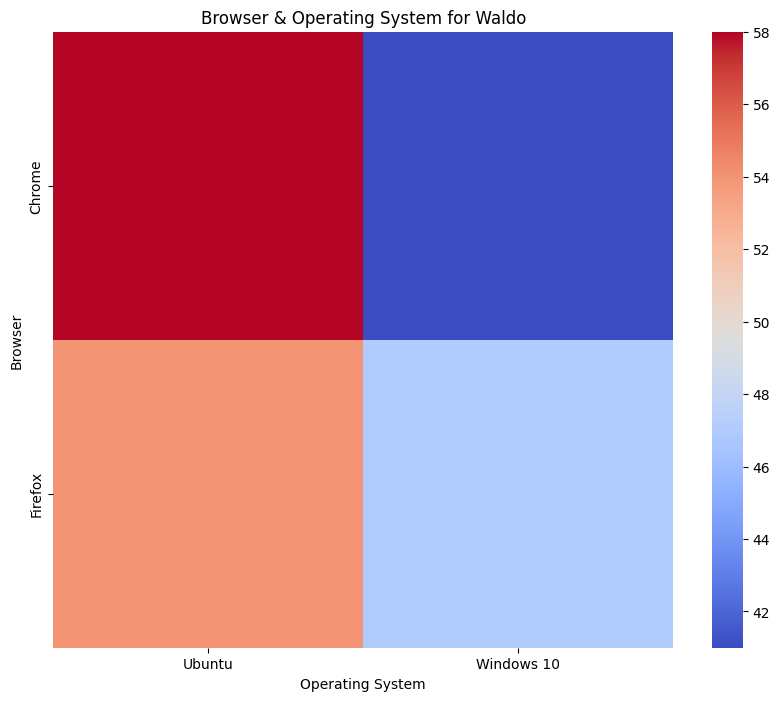

In [11]:
# Explore the correlation of operating system and browser for Waldo
plt.figure(figsize=(10, 8))
heatmap_data_user_0 = user_0_data.groupby(['browser', 'os']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data_user_0, cmap="coolwarm")
plt.xlabel('Operating System')
plt.ylabel('Browser')
plt.title('Browser & Operating System for Waldo')
plt.show()

Graphs illustrates a correlation between browsers and operating systems. Notably, users on **macOS** predominantly use **Safari**. This observation could be **significant in identifying Waldo, as he does not utilize this operating system**.

Additionally, it's worth noting that a significant portion of users utilize the **Windows 10 OS** and they primarily favor **Chrome**. Unfortunately, **Waldo also uses this OS and browser**, so it might be **challenging to distinguish** him based on this feature.

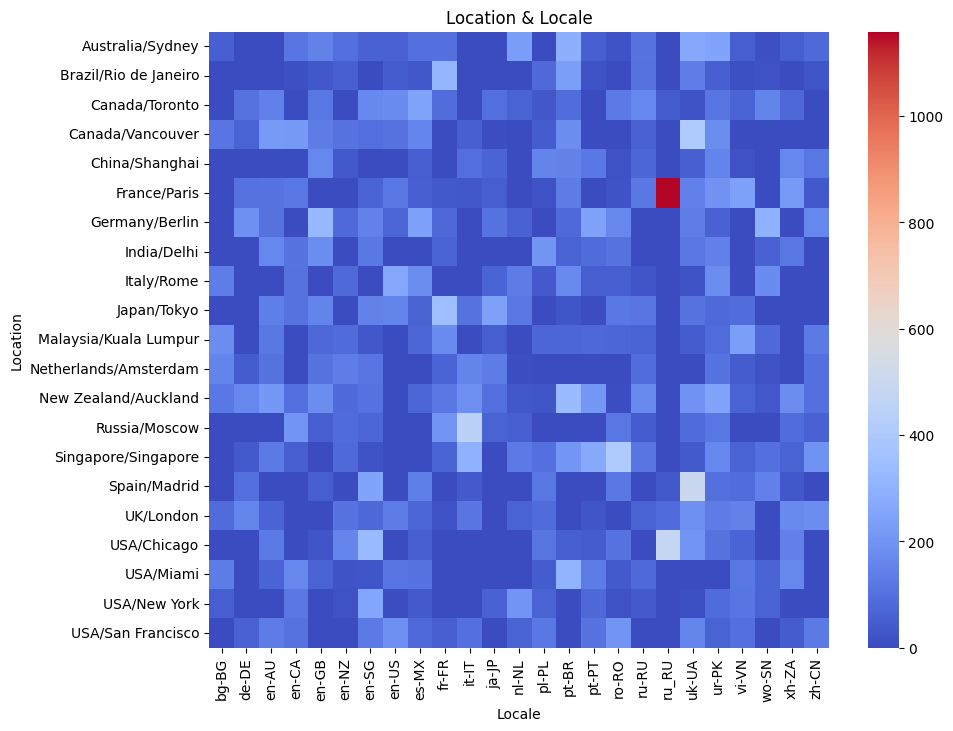

In [12]:
# Explore the correlation between location and locale
plt.figure(figsize=(10, 8))
heatmap_data = data.groupby(['location', 'locale']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap="coolwarm")
plt.xlabel('Locale')
plt.ylabel('Location')
plt.title('Location & Locale')
plt.show()

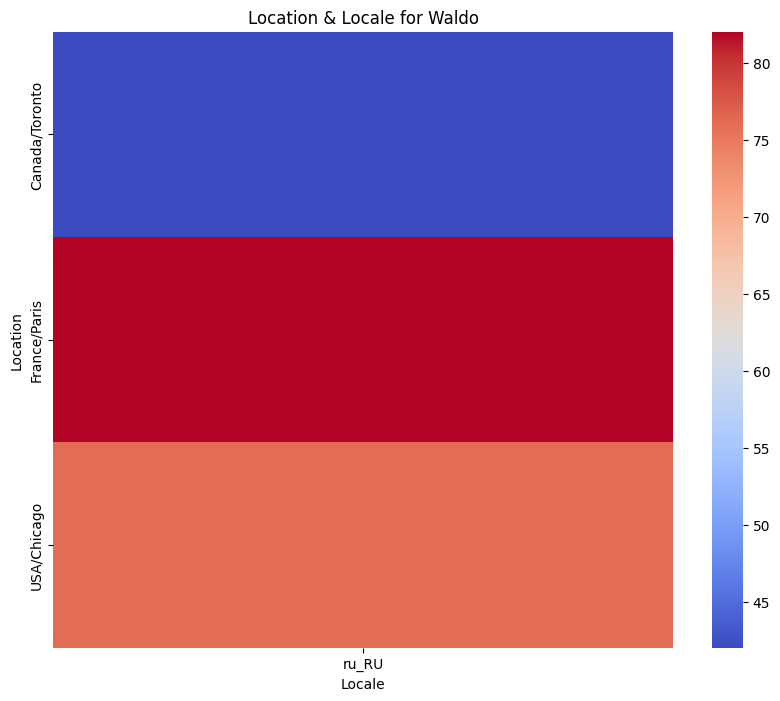

In [13]:
# Explore the correlation between location and locale for Waldo
plt.figure(figsize=(10, 8))
heatmap_data_user_0 = user_0_data.groupby(['location', 'locale']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data_user_0, cmap="coolwarm")
plt.xlabel('Locale')
plt.ylabel('Location')
plt.title('Location & Locale for Waldo')
plt.show()

Upon examining the data on the correlation between location and locale, we notice something peculiar: the presence of both **"ru_RU" and "ru-RU."** Perhaps it's worth adjusting the data for consistency.

Furthermore, we observe an **unusually high number** of records at the intersection of **"ru_RU" and "France/Paris."**

We observe that Waldo utilizes different combinations of location and locale. Unfortunately, he uses the **locale "ru_RU" and location "France/Paris"** in most of the cases, which is a common setting among many users. Therefore, this parameter is **unlikely to be very helpful** in distinguishing him.

In [14]:
# Finding top sites for Waldo by count
all_sites = [site['site'] for sites in user_0_data['sites'] for site in sites]
site_counts = pd.Series(all_sites).value_counts()
top_sites_by_counts = site_counts.head(6)

print("\nTop 6 sites by counts:")
print(top_sites_by_counts)

# Finding top sites for Waldo by visiting time
site_total_time = {}
for sites in user_0_data['sites']:
    for site in sites:
        site_name = site['site']
        site_total_time[site_name] = site_total_time.get(site_name, 0) + site['length']
site_total_time_series = pd.Series(site_total_time)
top_sites_by_visiting_time = site_total_time_series.sort_values(ascending=False).head(6)

print("\nTop 6 sites by total visiting time:")
print(top_sites_by_visiting_time)

# Since the top sites are the same, combine them into one variable
top_sites_user_0 = top_sites_by_counts


Top 6 sites by counts:
lenta.ru           182
toptal.com         179
vk.com             175
slack.com          173
mail.google.com    170
youtube.com        170
Name: count, dtype: int64

Top 6 sites by total visiting time:
lenta.ru           26451
toptal.com         23964
slack.com          23775
mail.google.com    22500
vk.com             22475
youtube.com        22263
dtype: int64


We can see the Top-6 **most frequently visited sites** and the s**ites where Waldo spends the most time** (they are the same) will **likely be useful** in identifying him. We chose to focus on the top 6 sites because beyond that, there is a sharp decrease in frequency and time spent, suggesting that further sites may not be as significant in distinguishing him.

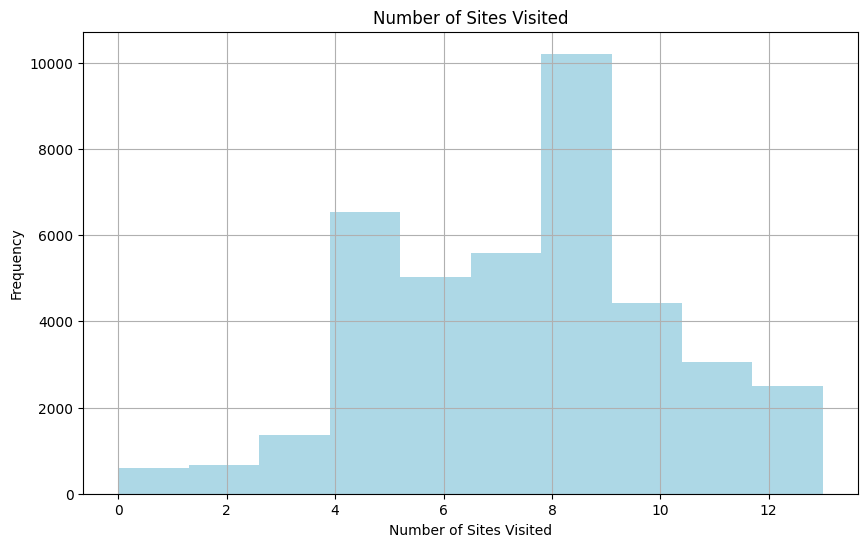

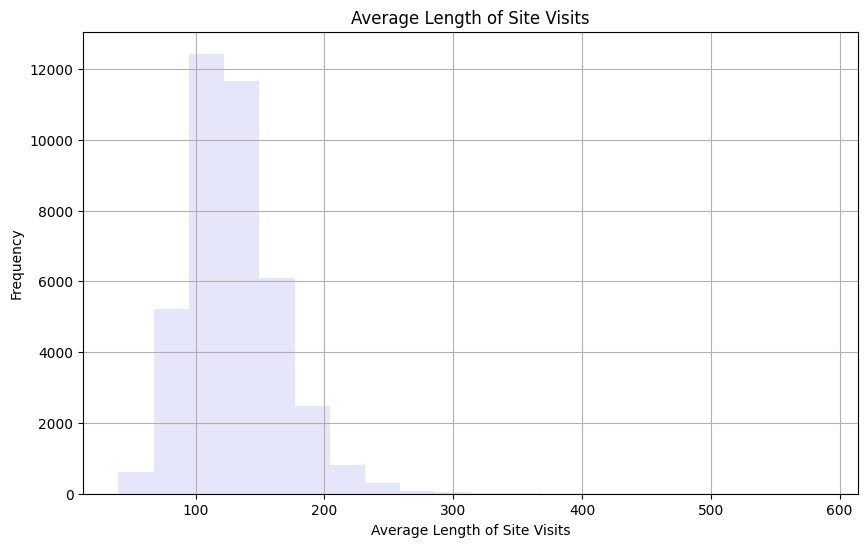

In [15]:
# Distribution of the number of sites visited for all users
sites_count_all = data['sites'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(sites_count_all, color='lightblue')
plt.xlabel('Number of Sites Visited')
plt.ylabel('Frequency')
plt.title('Number of Sites Visited')
plt.grid(True)
plt.show()

# Distribution of the average length of site visits for all users
sites_avg_length_all = data['sites'].apply(lambda x: pd.Series([d['length'] for d in x]).mean())
plt.figure(figsize=(10, 6))
plt.hist(sites_avg_length_all, bins=20, color='lavender')
plt.xlabel('Average Length of Site Visits')
plt.ylabel('Frequency')
plt.title('Average Length of Site Visits')
plt.grid(True)
plt.show()

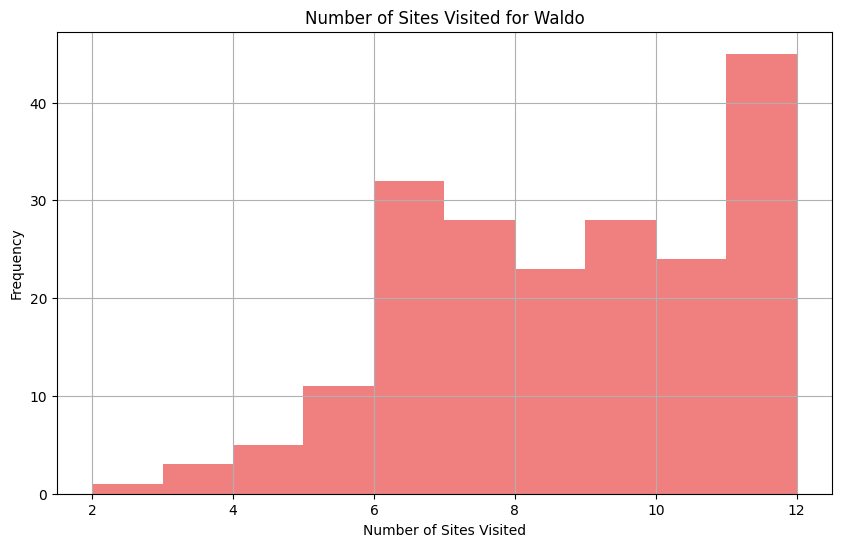

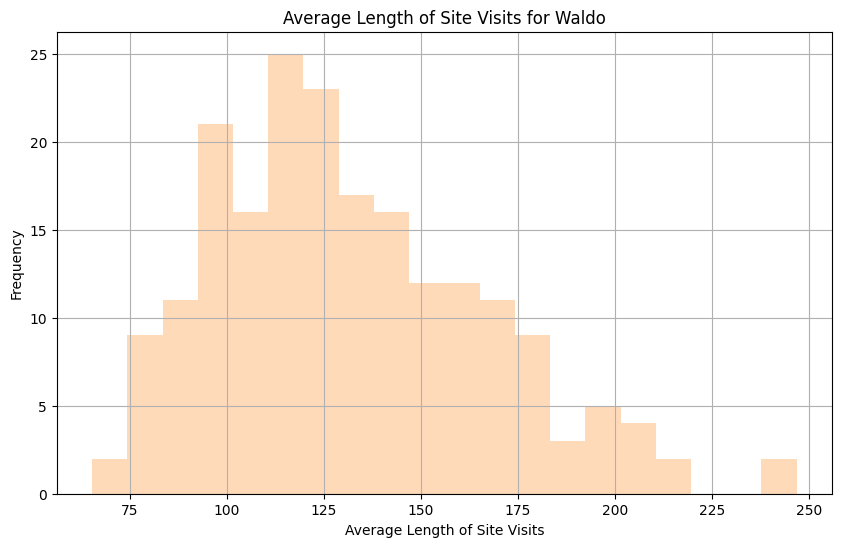

In [16]:
# Distribution of the number of sites visited for Waldo
sites_count_user_0 = user_0_data['sites'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(sites_count_user_0, color='lightcoral')
plt.xlabel('Number of Sites Visited')
plt.ylabel('Frequency')
plt.title('Number of Sites Visited for Waldo')
plt.grid(True)
plt.show()

# Distribution of the average length of site visits for Waldo
sites_avg_length_user_0 = user_0_data['sites'].apply(lambda x: pd.Series([d['length'] for d in x]).mean())
plt.figure(figsize=(10, 6))
plt.hist(sites_avg_length_user_0, bins=20, color='#FFDAB9')
plt.xlabel('Average Length of Site Visits')
plt.ylabel('Frequency')
plt.title('Average Length of Site Visits for Waldo')
plt.grid(True)
plt.show()


We can see that Waldo stands out by visiting a **relatively high number of sites** in significant number of sessions, which could be **valuable in identifying** him. However, **his average time spent on each site does not vary significantly**.

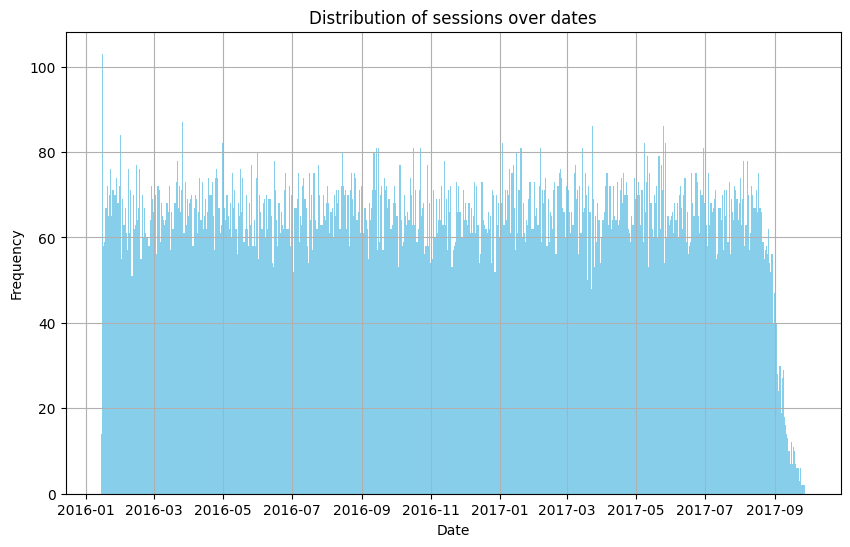

In [17]:
# Distribution of sessions dates
data['date'] = pd.to_datetime(data['date'])
plt.figure(figsize=(10, 6))
plt.hist(data['date'], bins=pd.date_range(start=data['date'].min(), end=data['date'].max(), freq='D'), color='skyblue')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of sessions over dates')
plt.grid(True)
plt.show()

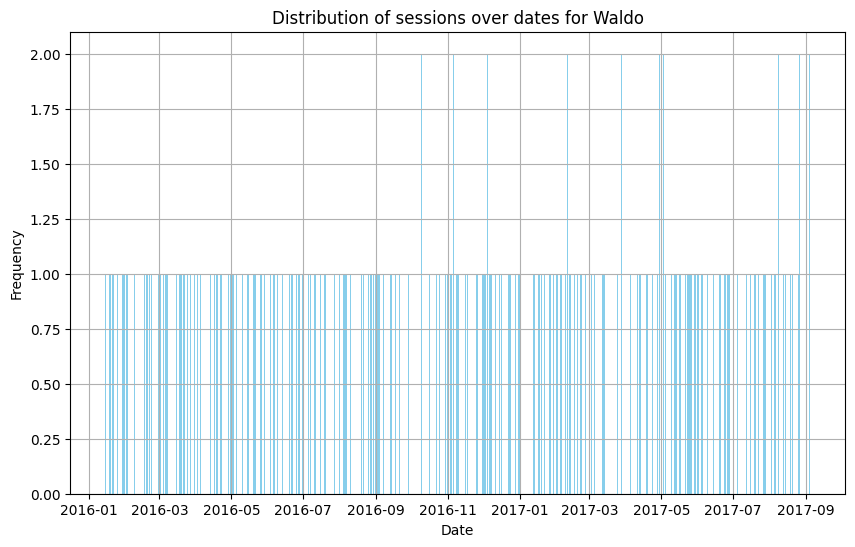

In [18]:
# Distribution of sessions dates for Waldo
plt.figure(figsize=(10, 6))
plt.hist(user_0_data['date'], bins=pd.date_range(start=user_0_data['date'].min(), end=user_0_data['date'].max(), freq='D'), color='skyblue')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of sessions over dates for Waldo')
plt.grid(True)
plt.show()

We observe that there **isn't a significant amount of data for the end of 2017**. Therefore, if we need to identify Waldo based on sessions during these dates, it will likely be **challenging** to do so effectively.

However, if the data for the test set **falls within the remaining range**, the **date should greatly aid in determining** Walso. This is because the activity is primarily concentrated in the near dates.


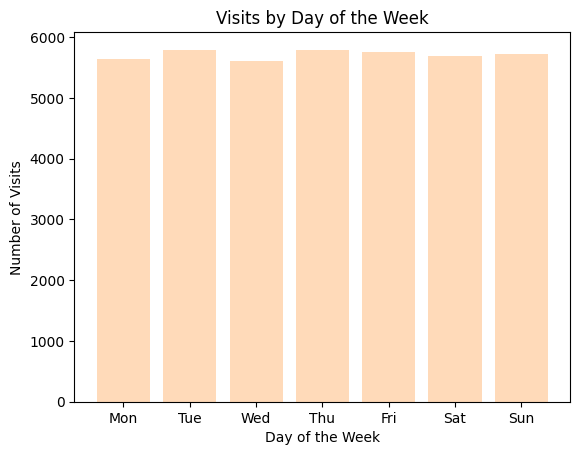

In [19]:
visits_by_day = data['date'].dt.dayofweek.value_counts().sort_index()
plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], visits_by_day, color='#FFDAB9')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Visits')
plt.title('Visits by Day of the Week')
plt.show()

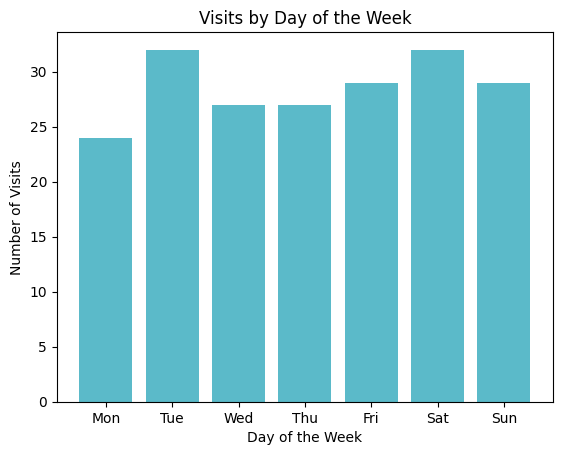

In [20]:
visits_by_day = user_0_data['date'].dt.dayofweek.value_counts().sort_index()
plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], visits_by_day, color='#5BBAC9')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Visits')
plt.title('Visits by Day of the Week')
plt.show()

Sessions for all users and Waldo are pretty evenly distributed throughout the days of the week. However, maybe adding this column during preprocessing might provide some assistance.


*Based on the conducted analysis, I believe that top important features for identifying Waldo are:*

1. **Top Visited Sites:** The sites most frequently visited by Waldo, as well as those where he spends the most time, are likely to be useful features for identification.

2. **Locale and Location:** Waldo's usage patterns in locale 'ru_RU' and one of three specific locations may also be helpful in identifying him.

3. **Browser and Operating System:** Waldo's choice of browser and operating system, particularly the absence of Safari on macOS, could be significant in distinguishing him from other users.

4. **Date and Time:** The distribution of sessions over dates can provide valuable insights for identifying Waldo if the dataset to predict has dates that overlap with the training data. Additionally, the time during which Waldo starts sessions may also contribute to his identification, because usually he starts in specific range.

## Data Preprocessing and Feature Engineering


At this stage, we will focus **handling missing values, encoding categorical variables, normalizing data, and creating new features**. These steps are informed by insights from EDA and aim to enhance model's ability to learn from the data.


In [21]:
# Verify the absence of missing values to confirm that no handling is necessary
missing_values = data.isnull().sum()
print(missing_values)

browser     0
os          0
locale      0
user_id     0
location    0
sites       0
time        0
date        0
dtype: int64


In [22]:
# Replace 'ru_RU' with 'ru-RU' in the 'locale' column to ensure consistency
data['locale'] = data['locale'].replace('ru_RU', 'ru-RU')

In [23]:
# Apply One-Hot Encoding to categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
data.drop(columns=categorical_features, inplace=True)
data = pd.concat([data, encoded_df], axis=1)

In [24]:
# Create 3 new columns ['total_sites_visited', 'total_time_spent', 'average_time_per_site']
total_sites = []
total_time = []
average_time_per_site = []

for sites_list in data['sites']:
    num_sites = len(sites_list)
    total_sites.append(num_sites)

    total_time_session = sum(site['length'] for site in sites_list)
    total_time.append(total_time_session)

    if num_sites > 0:
        avg_time_site = total_time_session / num_sites
    else:
        avg_time_site = 0
    average_time_per_site.append(avg_time_site)


data['total_sites_visited'] = total_sites
data['total_time_spent'] = total_time
data['average_time_per_site'] = average_time_per_site

In [25]:
# Calculate the total time spent on each Waldo's top site
for site in top_sites_user_0.index:
    data[site] = 0
for index, row in data.iterrows():
    for site_info in row['sites']:
        site = site_info['site']
        if site in top_sites_user_0.index:
            length = site_info['length']
            data.at[index, site] += length

In [26]:
# Use MinMaxScaler to scale the features to a range between 0 and 1
scaler = MinMaxScaler()
data[['total_sites_visited', 'total_time_spent', 'average_time_per_site']] = scaler.fit_transform(data[['total_sites_visited', 'total_time_spent', 'average_time_per_site']])
data[top_sites_user_0.index] = scaler.fit_transform(data[top_sites_user_0.index])
data.drop(columns=['sites'], inplace=True)

In next code snippet, **cyclical encoding** is employed to efficiently represent time. Cyclical encoding treats time as a cyclical feature rather than a linear one, which is beneficial for handling **periodic data** such as hours of the day, where the beginning and end are connected. Instead of treating hours as a linear sequence from 1 to 24, they are mapped onto a circle. This circular representation means that hour 1 and hour 24 are close to each other, similar to reality.

To achieve this, trigonometric functions like **sine and cosine** are utilized. By calculating the sine and cosine of the hour, the hour is mapped to values between -1 and 1. These values create a circular representation where the start and end points smoothly transition.

After obtaining the sine and cosine values, they are **normalized to the range [0, 1] using simple algebra (+1 and divide by 2)**.


This segment stands out as my favorite. I find this approach particularly elegant as it effectively captures the cyclic nature of time and offers a straightforward normalization process))

In [27]:
# Encode and normilise time using cyclical encoding
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S')
data['sin_time'] = np.sin(2 * np.pi * data['time'].dt.hour / 24)
data['cos_time'] = np.cos(2 * np.pi * data['time'].dt.hour / 24)
data['sin_time'] = (data['sin_time'] + 1) / 2
data['cos_time'] = (data['cos_time'] + 1) / 2

data.drop(columns=['time'], inplace=True)

In [28]:
# Create new columns using information from "date" column
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek.astype('category')
data['is_weekend'] = data['date'].dt.dayofweek.isin([5, 6]).astype(int)

# Use scaler to scale the features to a range between 0 and 1
data[['year', 'month', 'day', 'day_of_week', 'is_weekend']] = scaler.fit_transform(data[['year', 'month', 'day', 'day_of_week', 'is_weekend']])
data.drop(columns=['date'], inplace=True)

In [29]:
# Add the 'is_waldo' column based on the condition 'user_id == 0'
data['is_waldo'] = data['user_id'].apply(lambda x: 1 if x == 0 else 0).astype('float64')
data.drop(columns=['user_id'], inplace=True)

In [30]:
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   browser_Firefox                 40000 non-null  float64
 1   browser_Internet Explorer       40000 non-null  float64
 2   browser_Safari                  40000 non-null  float64
 3   os_MacOS                        40000 non-null  float64
 4   os_Ubuntu                       40000 non-null  float64
 5   os_Windows 10                   40000 non-null  float64
 6   os_Windows 7                    40000 non-null  float64
 7   os_Windows 8                    40000 non-null  float64
 8   locale_de-DE                    40000 non-null  float64
 9   locale_en-AU                    40000 non-null  float64
 10  locale_en-CA                    40000 non-null  float64
 11  locale_en-GB                    40000 non-null  float64
 12  locale_en-NZ                    

,browser_Firefox,browser_Internet Explorer,browser_Safari,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,locale_de-DE,locale_en-AU,...,mail.google.com,youtube.com,sin_time,cos_time,year,month,day,day_of_week,is_weekend,is_waldo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.933013,0.750000,1.0,0.454545,0.933333,0.500000,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.853553,0.853553,0.0,0.181818,0.733333,0.333333,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.982963,0.629410,0.0,0.909091,0.533333,0.500000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.167539,0.192308,0.500000,1.000000,0.0,0.636364,0.733333,0.166667,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.378709,0.000000,0.250000,0.933013,0.0,0.545455,0.733333,0.833333,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,0.500000,0.0,0.272727,0.066667,1.000000,1.0,0.0
39996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.109948,0.141880,0.066987,0.750000,0.0,1.000000,0.900000,0.333333,0.0,0.0
39997,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.933013,0.750000,0.0,0.545455,0.833333,0.166667,0.0,0.0
39998,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.750000,0.066987,1.0,0.000000,0.000000,1.000000,1.0,0.0


**Do the same steps for verification data**

In [31]:
verify_data = pd.read_json('task_1_verify.json')
verify_data

,browser,os,locale,location,sites,time,date
0,Internet Explorer,Windows 8,xh-ZA,France/Paris,"[{'site': 'baidu.com', 'length': 201}, {'site'...",14:13:00,2016-11-05
1,Chrome,Windows 10,ja-JP,Germany/Berlin,"[{'site': 'toptal.com', 'length': 96}, {'site'...",21:06:00,2017-02-22
2,Chrome,Windows 10,it-IT,Singapore/Singapore,"[{'site': 'bing.net', 'length': 225}, {'site':...",13:17:00,2016-01-30
3,Chrome,Windows 10,ur-PK,UK/London,"[{'site': 'google.com', 'length': 113}, {'site...",17:00:00,2017-02-27
4,Firefox,Ubuntu,en-CA,Russia/Moscow,"[{'site': 'googleapis.com', 'length': 243}, {'...",18:11:00,2017-04-19
...,...,...,...,...,...,...,...
39995,Firefox,Windows 10,en-AU,India/Delhi,"[{'site': 'instagram.com', 'length': 170}, {'s...",14:12:00,2016-08-27
39996,Chrome,Windows 10,en-US,Italy/Rome,"[{'site': 'youtube.com', 'length': 55}, {'site...",18:49:00,2016-07-12
39997,Chrome,Windows 8,en-SG,USA/Chicago,"[{'site': 'mail.google.com', 'length': 178}, {...",15:58:00,2016-06-22
39998,Chrome,Windows 10,xh-ZA,UK/London,"[{'site': 'toptal.com', 'length': 89}, {'site'...",05:30:00,2016-05-19


In [32]:
# Verify the absence of missing values to confirm that no handling is necessary
missing_values = verify_data.isnull().sum()
print(missing_values)

browser     0
os          0
locale      0
location    0
sites       0
time        0
date        0
dtype: int64


In [33]:
# Replace 'ru_RU' with 'ru-RU' in the 'locale' column to ensure consistency
verify_data['locale'] = verify_data['locale'].replace('ru_RU', 'ru-RU')

In [34]:
# Apply One-Hot Encoding to categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(verify_data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
verify_data.drop(columns=categorical_features, inplace=True)
verify_data = pd.concat([verify_data, encoded_df], axis=1)

In [35]:
# Create 3 new columns ['total_sites_visited', 'total_time_spent', 'average_time_per_site']
total_sites = []
total_time = []
average_time_per_site = []

for sites_list in verify_data['sites']:
    num_sites = len(sites_list)
    total_sites.append(num_sites)

    total_time_session = sum(site['length'] for site in sites_list)
    total_time.append(total_time_session)

    if num_sites > 0:
        avg_time_site = total_time_session / num_sites
    else:
        avg_time_site = 0
    average_time_per_site.append(avg_time_site)


verify_data['total_sites_visited'] = total_sites
verify_data['total_time_spent'] = total_time
verify_data['average_time_per_site'] = average_time_per_site

In [36]:
# Calculate the total time spent on each Waldo's top site
for site in top_sites_user_0.index:
    verify_data[site] = 0
for index, row in verify_data.iterrows():
    for site_info in row['sites']:
        site = site_info['site']
        if site in top_sites_user_0.index:
            length = site_info['length']
            verify_data.at[index, site] += length

In [37]:
# Use MinMaxScaler to scale the features to a range between 0 and 1
verify_data[['total_sites_visited', 'total_time_spent', 'average_time_per_site']] = scaler.fit_transform(verify_data[['total_sites_visited', 'total_time_spent', 'average_time_per_site']])
verify_data[top_sites_user_0.index] = scaler.fit_transform(verify_data[top_sites_user_0.index])
verify_data.drop(columns=['sites'], inplace=True)

In [38]:
# Encode and normilise time using cyclical encoding
verify_data['time'] = pd.to_datetime(verify_data['time'], format='%H:%M:%S')
verify_data['sin_time'] = np.sin(2 * np.pi * verify_data['time'].dt.hour / 24)
verify_data['cos_time'] = np.cos(2 * np.pi * verify_data['time'].dt.hour / 24)
verify_data['sin_time'] = (verify_data['sin_time'] + 1) / 2
verify_data['cos_time'] = (verify_data['cos_time'] + 1) / 2

verify_data.drop(columns=['time'], inplace=True)

In [39]:
# Create new columns using information from "date" column
verify_data['year'] = verify_data['date'].dt.year
verify_data['month'] = verify_data['date'].dt.month
verify_data['day'] = verify_data['date'].dt.day
verify_data['day_of_week'] = verify_data['date'].dt.dayofweek.astype('category')
verify_data['is_weekend'] = verify_data['date'].dt.dayofweek.isin([5, 6]).astype(int)

# Use scaler to scale the features to a range between 0 and 1
verify_data[['year', 'month', 'day', 'day_of_week', 'is_weekend']] = scaler.fit_transform(verify_data[['year', 'month', 'day', 'day_of_week', 'is_weekend']])
verify_data.drop(columns=['date'], inplace=True)

In [40]:
print(verify_data.info())
verify_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   browser_Firefox                 40000 non-null  float64
 1   browser_Internet Explorer       40000 non-null  float64
 2   browser_Safari                  40000 non-null  float64
 3   os_MacOS                        40000 non-null  float64
 4   os_Ubuntu                       40000 non-null  float64
 5   os_Windows 10                   40000 non-null  float64
 6   os_Windows 7                    40000 non-null  float64
 7   os_Windows 8                    40000 non-null  float64
 8   locale_de-DE                    40000 non-null  float64
 9   locale_en-AU                    40000 non-null  float64
 10  locale_en-CA                    40000 non-null  float64
 11  locale_en-GB                    40000 non-null  float64
 12  locale_en-NZ                    

,browser_Firefox,browser_Internet Explorer,browser_Safari,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,locale_de-DE,locale_en-AU,...,slack.com,mail.google.com,youtube.com,sin_time,cos_time,year,month,day,day_of_week,is_weekend
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.250000,0.066987,0.0,0.909091,0.133333,0.833333,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.182087,0.000000,0.000000,0.146447,0.853553,1.0,0.090909,0.700000,0.333333,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.370590,0.017037,0.0,0.000000,0.966667,0.833333,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.017037,0.370590,1.0,0.090909,0.866667,0.000000,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.500000,1.0,0.272727,0.600000,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.250000,0.066987,0.0,0.636364,0.866667,0.833333,1.0
39996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.044212,0.000000,0.500000,0.0,0.545455,0.366667,0.166667,0.0
39997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.234252,0.152267,0.000000,0.146447,0.146447,0.0,0.454545,0.700000,0.333333,0.0
39998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.982963,0.629410,0.0,0.363636,0.600000,0.500000,0.0


## Model Design and Training

In [93]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from keras.models import Sequential, save_model
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score, balanced_accuracy_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from keras.callbacks import EarlyStopping

In [94]:
# Split data into features (X) and labels (y)
X = data.drop(columns=['is_waldo'])
y = data['is_waldo']

In [95]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Resample the minority class (y_train == 1) to match the number of samples in the majority class (y_train == 0)
X_train_balanced, y_train_balanced = resample(X_train[y_train == 1],
                                              y_train[y_train == 1],
                                              replace=True,
                                              n_samples=X_train[y_train == 0].shape[0])

X_train_balanced = np.concatenate((X_train[X_train.index.isin(y_train[y_train == 0].index)], X_train_balanced))
y_train_balanced = np.concatenate((y_train[y_train == 0], y_train_balanced))

# Further split of training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, stratify=y_train_balanced)


In [96]:
# Create the model
model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(units=32, activation='sigmoid'),
    BatchNormalization(),
    Dense(units=1, activation='sigmoid')
])

*Observations during model design:*
1. **Simplicity:** While this model may appear simplistic at first glance, it proved to be surprisingly effective. More complex techniques like dropout yielded inferior performance.
2. **Activation Functions:** The transition from ReLU to sigmoid activation in the second layer makes a big difference. This seemingly minor adjustment led to a notable enhancement in model performance, showcasing the impact of thoughtful activation function selection.
3. **Layer Units:** Fine-tuning the number of units within each layer revealed that the configuration presented here represents the optimal balance between model complexity and performance.


In [104]:
# Define EarlyStopping callback and compile the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(optimizer= Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [105]:
# Train the model with balanced data
history = model.fit(X_train_split, y_train_split, epochs=100, batch_size=32, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])
save_model(model, 'task_1_model.keras')

# Predict probabilities for validation data
y_pred_prob_val = model.predict(X_val)

# Choosing best threshold based on F1 score to obtain predicted classes
thresholds = np.arange(0, 1, 0.01)
best_threshold = 0
best_f1 = 0
for threshold in thresholds:
    y_pred_thresh = (y_pred_prob_val >= threshold).astype(int)
    f1 = f1_score(y_val, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f'Best Threshold: {best_threshold}')


Epoch 1/100
1592/1592 [==============================] - 24s 10ms/step - loss: 0.0110 - accuracy: 0.9974 - val_loss: 0.0120 - val_accuracy: 0.9979
Epoch 2/100
1592/1592 [==============================] - 7s 5ms/step - loss: 0.0099 - accuracy: 0.9978 - val_loss: 0.0093 - val_accuracy: 0.9978
Epoch 3/100
1592/1592 [==============================] - 10s 6ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.0110 - val_accuracy: 0.9974
Epoch 4/100
1592/1592 [==============================] - 7s 4ms/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.0126 - val_accuracy: 0.9980
Epoch 5/100
1592/1592 [==============================] - 9s 6ms/step - loss: 0.0073 - accuracy: 0.9982 - val_loss: 0.0085 - val_accuracy: 0.9980
Epoch 6/100
1592/1592 [==============================] - 6s 4ms/step - loss: 0.0067 - accuracy: 0.9983 - val_loss: 0.0124 - val_accuracy: 0.9958
Epoch 7/100
1592/1592 [==============================] - 9s 6ms/step - loss: 0.0067 - accuracy: 0.9984 - val_loss: 0.0099 - val

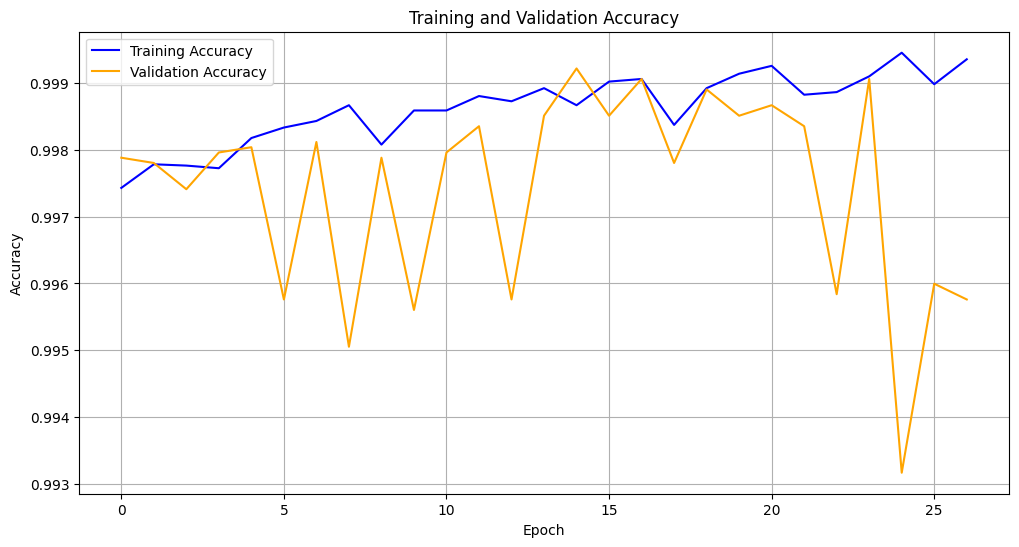

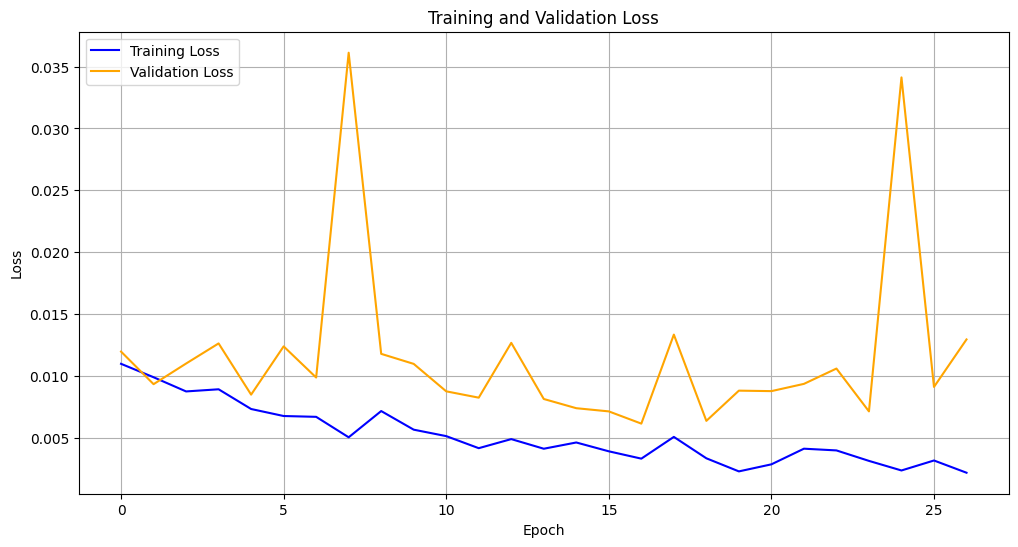

In [106]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
# Predict for test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= best_threshold).astype(int)

# Calculate and print metrics
print(f'Accuracy: { accuracy_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_prob)}')
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("Classification report:")
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 2ms/step
Accuracy: 0.996625
F1-score: 0.64
ROC AUC: 0.9970257537688442

Confusion matrix:
[[7949   11]
 [  16   24]]

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7960
         1.0       0.69      0.60      0.64        40

    accuracy                           1.00      8000
   macro avg       0.84      0.80      0.82      8000
weighted avg       1.00      1.00      1.00      8000



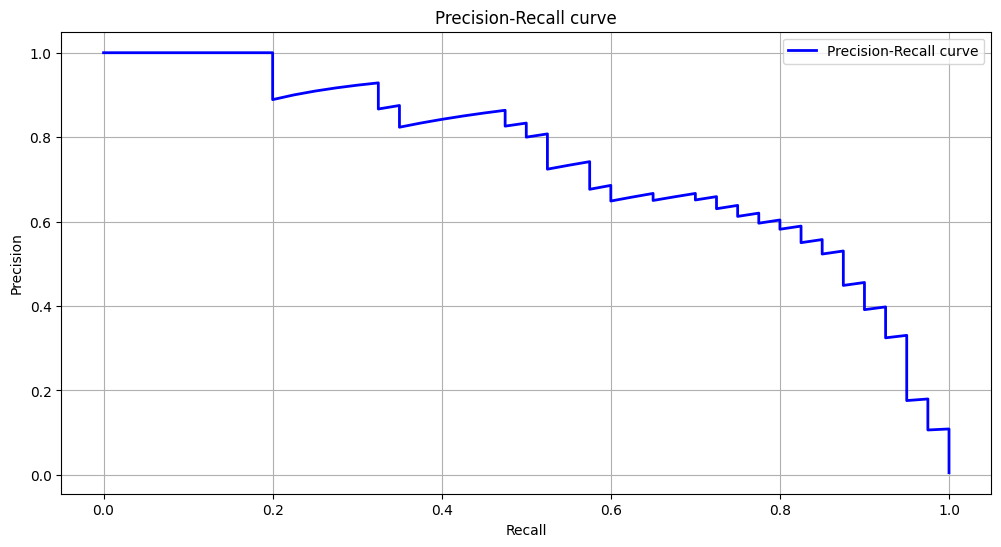

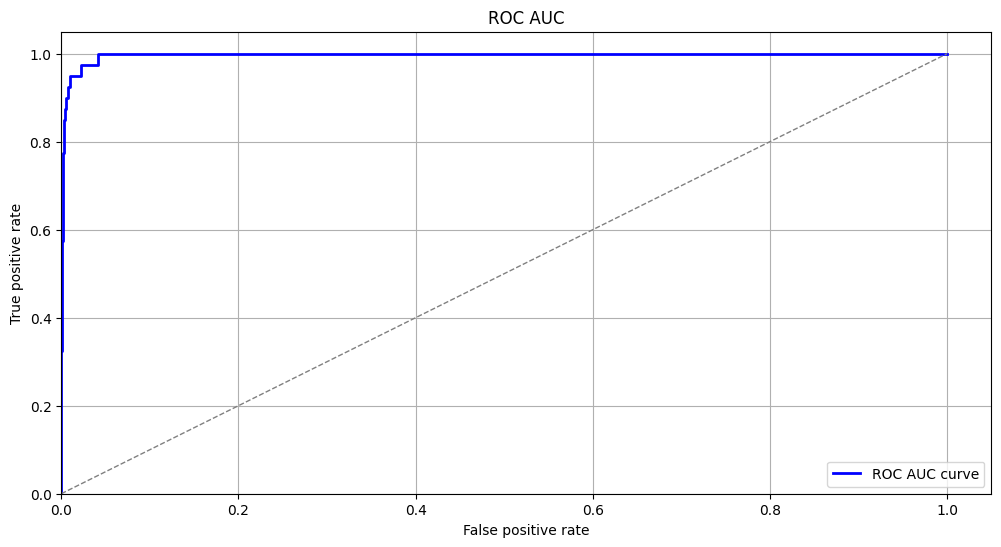

In [108]:
# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(12, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.grid(True)
plt.legend()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC AUC curve' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC AUC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Feature Importance Analysis


84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   0%|          | 5/1000 [00:00<?, ?it/s]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|          | 7/1000 [00:14<19:21,  1.17s/it]

107/107 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|          | 8/1000 [00:16<27:13,  1.65s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|          | 9/1000 [00:18<30:08,  1.82s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|          | 10/1000 [00:20<32:03,  1.94s/it]

103/103 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   1%|          | 11/1000 [00:24<39:45,  2.41s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|          | 12/1000 [00:27<42:51,  2.60s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|▏         | 13/1000 [00:29<40:20,  2.45s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|▏         | 14/1000 [00:31<38:31,  2.34s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 15/1000 [00:33<37:03,  2.26s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 16/1000 [00:35<35:21,  2.16s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   2%|▏         | 17/1000 [00:38<39:54,  2.44s/it]

105/105 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 18/1000 [00:42<49:03,  3.00s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 19/1000 [00:44<44:29,  2.72s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 20/1000 [00:46<41:17,  2.53s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 21/1000 [00:49<39:37,  2.43s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   2%|▏         | 22/1000 [00:51<40:26,  2.48s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 23/1000 [00:55<46:23,  2.85s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 24/1000 [00:57<43:29,  2.67s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▎         | 25/1000 [00:59<42:05,  2.59s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 26/1000 [01:02<40:21,  2.49s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 27/1000 [01:04<39:08,  2.41s/it]

87/87 [==============================] - 0s 4ms/step


PermutationExplainer explainer:   3%|▎         | 28/1000 [01:08<45:08,  2.79s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 29/1000 [01:10<44:15,  2.73s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 30/1000 [01:12<41:35,  2.57s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 31/1000 [01:15<40:16,  2.49s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 32/1000 [01:17<38:18,  2.37s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 33/1000 [01:19<38:03,  2.36s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   3%|▎         | 34/1000 [01:23<44:53,  2.79s/it]

108/108 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 35/1000 [01:25<41:43,  2.59s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 36/1000 [01:27<39:30,  2.46s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 37/1000 [01:29<37:35,  2.34s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 38/1000 [01:32<36:59,  2.31s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 39/1000 [01:34<38:17,  2.39s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 40/1000 [01:38<44:35,  2.79s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 41/1000 [01:40<41:37,  2.60s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 42/1000 [01:42<39:11,  2.45s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 43/1000 [01:44<37:02,  2.32s/it]

113/113 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 44/1000 [01:46<36:10,  2.27s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   4%|▍         | 45/1000 [01:50<42:19,  2.66s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 46/1000 [01:53<43:32,  2.74s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 47/1000 [01:55<41:12,  2.59s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 48/1000 [01:57<39:05,  2.46s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 49/1000 [01:59<37:55,  2.39s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   5%|▌         | 50/1000 [02:02<36:52,  2.33s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 51/1000 [02:06<44:26,  2.81s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 52/1000 [02:08<41:00,  2.60s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 53/1000 [02:10<39:30,  2.50s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 54/1000 [02:12<38:15,  2.43s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 55/1000 [02:14<36:43,  2.33s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   6%|▌         | 56/1000 [02:17<39:38,  2.52s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 57/1000 [02:21<43:28,  2.77s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 58/1000 [02:23<40:38,  2.59s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 59/1000 [02:25<37:41,  2.40s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 60/1000 [02:27<37:09,  2.37s/it]

110/110 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 61/1000 [02:29<36:51,  2.36s/it]

98/98 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   6%|▌         | 62/1000 [02:33<43:04,  2.75s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 63/1000 [02:35<41:37,  2.67s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 64/1000 [02:37<38:31,  2.47s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 65/1000 [02:40<37:35,  2.41s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 66/1000 [02:42<36:27,  2.34s/it]

102/102 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   7%|▋         | 67/1000 [02:45<38:09,  2.45s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 68/1000 [02:49<45:16,  2.91s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 69/1000 [02:51<42:12,  2.72s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 70/1000 [02:53<40:37,  2.62s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 71/1000 [02:56<39:06,  2.53s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 72/1000 [02:58<38:33,  2.49s/it]

94/94 [==============================] - 0s 4ms/step


PermutationExplainer explainer:   7%|▋         | 73/1000 [03:02<46:59,  3.04s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 74/1000 [03:05<43:47,  2.84s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 75/1000 [03:07<40:01,  2.60s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 76/1000 [03:09<38:04,  2.47s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 77/1000 [03:11<37:05,  2.41s/it]

87/87 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   8%|▊         | 78/1000 [03:14<38:40,  2.52s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 79/1000 [03:18<44:24,  2.89s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 80/1000 [03:20<41:39,  2.72s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 81/1000 [03:22<39:06,  2.55s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 82/1000 [03:24<37:19,  2.44s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 83/1000 [03:27<35:53,  2.35s/it]

99/99 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   8%|▊         | 84/1000 [03:30<43:09,  2.83s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 85/1000 [03:33<42:08,  2.76s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 86/1000 [03:35<39:21,  2.58s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 87/1000 [03:38<38:07,  2.51s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 88/1000 [03:40<35:47,  2.36s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 89/1000 [03:42<34:09,  2.25s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   9%|▉         | 90/1000 [03:45<40:15,  2.65s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 91/1000 [03:48<40:12,  2.65s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 92/1000 [03:50<37:57,  2.51s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 93/1000 [03:52<36:53,  2.44s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 94/1000 [03:54<35:38,  2.36s/it]

104/104 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  10%|▉         | 95/1000 [03:58<39:37,  2.63s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 96/1000 [04:01<42:44,  2.84s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 97/1000 [04:03<40:01,  2.66s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 98/1000 [04:05<38:00,  2.53s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 99/1000 [04:08<36:18,  2.42s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 100/1000 [04:10<35:38,  2.38s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  10%|█         | 101/1000 [04:14<42:16,  2.82s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 102/1000 [04:16<41:31,  2.77s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 103/1000 [04:18<38:10,  2.55s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 104/1000 [04:21<35:43,  2.39s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 105/1000 [04:23<34:52,  2.34s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  11%|█         | 106/1000 [04:25<36:41,  2.46s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 107/1000 [04:29<42:37,  2.86s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 108/1000 [04:32<39:45,  2.67s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 109/1000 [04:34<37:01,  2.49s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 110/1000 [04:36<35:43,  2.41s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 111/1000 [04:38<34:35,  2.33s/it]

87/87 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  11%|█         | 112/1000 [04:41<39:41,  2.68s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 113/1000 [04:44<41:12,  2.79s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 114/1000 [04:47<38:31,  2.61s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 115/1000 [04:49<36:30,  2.48s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 116/1000 [04:51<35:00,  2.38s/it]

97/97 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  12%|█▏        | 117/1000 [04:53<34:12,  2.33s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 118/1000 [04:57<42:11,  2.87s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 119/1000 [04:59<38:05,  2.59s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 120/1000 [05:02<36:28,  2.49s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 121/1000 [05:04<35:30,  2.42s/it]

108/108 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 122/1000 [05:06<34:49,  2.38s/it]

102/102 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  12%|█▏        | 123/1000 [05:09<38:14,  2.62s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 124/1000 [05:13<41:53,  2.87s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▎        | 125/1000 [05:15<38:40,  2.65s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 126/1000 [05:17<36:49,  2.53s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 127/1000 [05:19<35:02,  2.41s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 128/1000 [05:21<33:32,  2.31s/it]

101/101 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  13%|█▎        | 129/1000 [05:25<40:30,  2.79s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 130/1000 [05:28<39:58,  2.76s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 131/1000 [05:30<37:19,  2.58s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 132/1000 [05:32<35:14,  2.44s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 133/1000 [05:34<33:05,  2.29s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 134/1000 [05:37<34:43,  2.41s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 135/1000 [05:41<40:45,  2.83s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 136/1000 [05:43<37:29,  2.60s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 137/1000 [05:45<34:25,  2.39s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 138/1000 [05:47<33:11,  2.31s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 139/1000 [05:49<32:02,  2.23s/it]

104/104 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  14%|█▍        | 140/1000 [05:52<36:46,  2.57s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 141/1000 [05:55<39:19,  2.75s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 142/1000 [05:58<37:19,  2.61s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 143/1000 [06:00<35:32,  2.49s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 144/1000 [06:02<33:55,  2.38s/it]

118/118 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 145/1000 [06:05<35:06,  2.46s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  15%|█▍        | 146/1000 [06:08<40:44,  2.86s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 147/1000 [06:10<37:48,  2.66s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 148/1000 [06:13<35:37,  2.51s/it]

105/105 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 149/1000 [06:15<34:28,  2.43s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 150/1000 [06:17<33:18,  2.35s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  15%|█▌        | 151/1000 [06:20<36:39,  2.59s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 152/1000 [06:23<38:46,  2.74s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 153/1000 [06:25<36:20,  2.57s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 154/1000 [06:27<33:45,  2.39s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 155/1000 [06:30<32:54,  2.34s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 156/1000 [06:32<32:21,  2.30s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  16%|█▌        | 157/1000 [06:36<39:59,  2.85s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 158/1000 [06:38<36:47,  2.62s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 159/1000 [06:40<35:09,  2.51s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 160/1000 [06:42<33:20,  2.38s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 161/1000 [06:45<32:11,  2.30s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  16%|█▌        | 162/1000 [06:47<31:40,  2.27s/it]

106/106 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  16%|█▋        | 163/1000 [06:51<39:45,  2.85s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 164/1000 [06:53<37:27,  2.69s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 165/1000 [06:55<35:31,  2.55s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 166/1000 [06:58<34:16,  2.47s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 167/1000 [07:00<33:45,  2.43s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  17%|█▋        | 168/1000 [07:03<36:09,  2.61s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 169/1000 [07:06<38:29,  2.78s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 170/1000 [07:08<35:58,  2.60s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 171/1000 [07:11<33:39,  2.44s/it]

111/111 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 172/1000 [07:13<32:47,  2.38s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 173/1000 [07:15<31:32,  2.29s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  17%|█▋        | 174/1000 [07:19<37:19,  2.71s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 175/1000 [07:21<37:09,  2.70s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 176/1000 [07:23<35:02,  2.55s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 177/1000 [07:26<33:03,  2.41s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 178/1000 [07:28<32:02,  2.34s/it]

99/99 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  18%|█▊        | 179/1000 [07:30<32:48,  2.40s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  18%|█▊        | 180/1000 [07:34<37:07,  2.72s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 181/1000 [07:36<36:43,  2.69s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 182/1000 [07:38<34:31,  2.53s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 183/1000 [07:41<32:47,  2.41s/it]

108/108 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 184/1000 [07:43<32:24,  2.38s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  18%|█▊        | 185/1000 [07:46<35:10,  2.59s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▊        | 186/1000 [07:49<37:02,  2.73s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▊        | 187/1000 [07:51<35:06,  2.59s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 188/1000 [07:54<33:52,  2.50s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 189/1000 [07:56<32:47,  2.43s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 190/1000 [07:58<31:31,  2.33s/it]

101/101 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  19%|█▉        | 191/1000 [08:02<38:43,  2.87s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 192/1000 [08:05<37:49,  2.81s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 193/1000 [08:07<35:43,  2.66s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 194/1000 [08:09<34:06,  2.54s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 195/1000 [08:12<32:58,  2.46s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 196/1000 [08:14<33:22,  2.49s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 197/1000 [08:18<38:19,  2.86s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 198/1000 [08:20<34:45,  2.60s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 199/1000 [08:22<33:13,  2.49s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 200/1000 [08:24<31:29,  2.36s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 201/1000 [08:26<30:38,  2.30s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 202/1000 [08:29<31:30,  2.37s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 203/1000 [08:32<36:23,  2.74s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 204/1000 [08:35<33:30,  2.53s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 205/1000 [08:37<32:00,  2.42s/it]

101/101 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 206/1000 [08:39<31:13,  2.36s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 207/1000 [08:41<29:46,  2.25s/it]

99/99 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  21%|██        | 208/1000 [08:44<33:46,  2.56s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 209/1000 [08:47<35:40,  2.71s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 210/1000 [08:49<33:19,  2.53s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 211/1000 [08:51<31:45,  2.42s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 212/1000 [08:54<31:02,  2.36s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██▏       | 213/1000 [08:56<30:29,  2.32s/it]

98/98 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  21%|██▏       | 214/1000 [09:00<36:56,  2.82s/it]

105/105 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 215/1000 [09:03<36:36,  2.80s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 216/1000 [09:05<34:17,  2.62s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 217/1000 [09:07<32:25,  2.48s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 218/1000 [09:09<31:00,  2.38s/it]

85/85 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  22%|██▏       | 219/1000 [09:12<32:12,  2.47s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 220/1000 [09:16<37:35,  2.89s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 221/1000 [09:18<35:04,  2.70s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 222/1000 [09:20<32:54,  2.54s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 223/1000 [09:22<32:01,  2.47s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 224/1000 [09:25<31:14,  2.42s/it]

100/100 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  22%|██▎       | 225/1000 [09:28<35:49,  2.77s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 226/1000 [09:32<37:31,  2.91s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 227/1000 [09:34<34:49,  2.70s/it]

101/101 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 228/1000 [09:36<33:39,  2.62s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 229/1000 [09:39<32:20,  2.52s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  23%|██▎       | 230/1000 [09:42<34:13,  2.67s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 231/1000 [09:45<37:44,  2.94s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 232/1000 [09:47<35:19,  2.76s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 233/1000 [09:50<33:17,  2.60s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 234/1000 [09:52<30:51,  2.42s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 235/1000 [09:54<30:14,  2.37s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  24%|██▎       | 236/1000 [09:57<34:08,  2.68s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 237/1000 [10:01<35:55,  2.83s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 238/1000 [10:03<33:18,  2.62s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 239/1000 [10:05<30:59,  2.44s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 240/1000 [10:07<30:05,  2.38s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 241/1000 [10:09<29:18,  2.32s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  24%|██▍       | 242/1000 [10:12<32:27,  2.57s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 243/1000 [10:15<33:53,  2.69s/it]

101/101 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 244/1000 [10:18<32:56,  2.61s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 245/1000 [10:20<31:39,  2.52s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 246/1000 [10:22<30:11,  2.40s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  25%|██▍       | 247/1000 [10:25<31:01,  2.47s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 248/1000 [10:29<37:56,  3.03s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 249/1000 [10:31<35:45,  2.86s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 250/1000 [10:34<33:31,  2.68s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 251/1000 [10:36<31:38,  2.53s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 252/1000 [10:38<30:16,  2.43s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  25%|██▌       | 253/1000 [10:42<35:44,  2.87s/it]

111/111 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 254/1000 [10:45<35:24,  2.85s/it]

101/101 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 255/1000 [10:47<33:13,  2.68s/it]

106/106 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 256/1000 [10:49<31:58,  2.58s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 257/1000 [10:52<30:17,  2.45s/it]

83/83 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  26%|██▌       | 258/1000 [10:55<34:05,  2.76s/it]

104/104 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 259/1000 [10:59<37:44,  3.06s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 260/1000 [11:01<34:11,  2.77s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 261/1000 [11:03<31:27,  2.55s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 262/1000 [11:05<29:55,  2.43s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 263/1000 [11:07<29:09,  2.37s/it]

97/97 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  26%|██▋       | 264/1000 [11:12<36:45,  3.00s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 265/1000 [11:14<34:07,  2.79s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 266/1000 [11:16<32:14,  2.64s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 267/1000 [11:19<30:28,  2.49s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 268/1000 [11:21<29:23,  2.41s/it]

111/111 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  27%|██▋       | 269/1000 [11:24<32:18,  2.65s/it]

107/107 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 270/1000 [11:28<36:02,  2.96s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 271/1000 [11:30<33:32,  2.76s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 272/1000 [11:32<31:18,  2.58s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 273/1000 [11:34<29:47,  2.46s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 274/1000 [11:37<28:45,  2.38s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  28%|██▊       | 275/1000 [11:41<34:38,  2.87s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 276/1000 [11:43<32:13,  2.67s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 277/1000 [11:45<30:32,  2.53s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 278/1000 [11:47<29:32,  2.46s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 279/1000 [11:49<28:30,  2.37s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 280/1000 [11:52<29:34,  2.47s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 281/1000 [11:56<34:01,  2.84s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 282/1000 [11:58<31:45,  2.65s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 283/1000 [12:00<30:34,  2.56s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 284/1000 [12:03<29:50,  2.50s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 285/1000 [12:05<28:01,  2.35s/it]

101/101 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  29%|██▊       | 286/1000 [12:08<31:58,  2.69s/it]

104/104 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▊       | 287/1000 [12:11<33:21,  2.81s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 288/1000 [12:13<31:02,  2.62s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 289/1000 [12:16<29:37,  2.50s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 290/1000 [12:18<28:33,  2.41s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 291/1000 [12:20<27:21,  2.31s/it]

106/106 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  29%|██▉       | 292/1000 [12:25<35:19,  2.99s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 293/1000 [12:27<32:10,  2.73s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 294/1000 [12:29<30:17,  2.57s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 295/1000 [12:31<28:43,  2.44s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 296/1000 [12:33<28:03,  2.39s/it]

95/95 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  30%|██▉       | 297/1000 [12:36<30:41,  2.62s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 298/1000 [12:40<33:37,  2.87s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 299/1000 [12:42<31:24,  2.69s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 300/1000 [12:44<29:46,  2.55s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 301/1000 [12:47<28:20,  2.43s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  30%|███       | 302/1000 [12:50<33:13,  2.86s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 303/1000 [12:54<35:42,  3.07s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 304/1000 [12:56<32:43,  2.82s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 305/1000 [12:59<30:54,  2.67s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 306/1000 [13:01<29:20,  2.54s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 307/1000 [13:03<28:35,  2.47s/it]

99/99 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  31%|███       | 308/1000 [13:07<34:23,  2.98s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 309/1000 [13:10<33:23,  2.90s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 310/1000 [13:12<31:26,  2.73s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 311/1000 [13:15<29:59,  2.61s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 312/1000 [13:17<30:16,  2.64s/it]

101/101 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  31%|███▏      | 313/1000 [13:21<35:07,  3.07s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 314/1000 [13:24<34:49,  3.05s/it]

105/105 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 315/1000 [13:27<32:20,  2.83s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 316/1000 [13:29<30:43,  2.69s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 317/1000 [13:31<29:20,  2.58s/it]

99/99 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  32%|███▏      | 318/1000 [13:35<32:07,  2.83s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 319/1000 [13:39<35:41,  3.14s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 320/1000 [13:41<32:49,  2.90s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 321/1000 [13:43<31:08,  2.75s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 322/1000 [13:46<29:45,  2.63s/it]

91/91 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  32%|███▏      | 323/1000 [13:49<31:16,  2.77s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 324/1000 [13:52<33:52,  3.01s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▎      | 325/1000 [13:55<32:58,  2.93s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 326/1000 [13:57<30:48,  2.74s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 327/1000 [14:00<28:59,  2.59s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  33%|███▎      | 328/1000 [14:02<29:08,  2.60s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  33%|███▎      | 329/1000 [14:07<34:44,  3.11s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 330/1000 [14:09<32:03,  2.87s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 331/1000 [14:11<30:07,  2.70s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 332/1000 [14:13<28:32,  2.56s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 333/1000 [14:16<27:29,  2.47s/it]

93/93 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  33%|███▎      | 334/1000 [14:20<32:05,  2.89s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 335/1000 [14:23<32:01,  2.89s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 336/1000 [14:25<30:20,  2.74s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 337/1000 [14:27<28:38,  2.59s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 338/1000 [14:30<27:58,  2.54s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  34%|███▍      | 339/1000 [14:32<28:54,  2.62s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 340/1000 [14:36<33:19,  3.03s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 341/1000 [14:39<30:44,  2.80s/it]

112/112 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 342/1000 [14:41<30:52,  2.82s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 343/1000 [14:44<28:47,  2.63s/it]

98/98 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  34%|███▍      | 344/1000 [14:47<31:24,  2.87s/it]

105/105 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 345/1000 [14:51<34:50,  3.19s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 346/1000 [14:53<32:06,  2.95s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 347/1000 [14:56<29:59,  2.76s/it]

104/104 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 348/1000 [14:58<28:44,  2.64s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  35%|███▍      | 349/1000 [15:01<29:03,  2.68s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 350/1000 [15:05<33:32,  3.10s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 351/1000 [15:07<30:45,  2.84s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 352/1000 [15:10<28:59,  2.68s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 353/1000 [15:12<27:49,  2.58s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 354/1000 [15:14<27:07,  2.52s/it]

102/102 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  36%|███▌      | 355/1000 [15:18<30:21,  2.82s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 356/1000 [15:21<31:30,  2.94s/it]

104/104 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 357/1000 [15:24<30:47,  2.87s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 358/1000 [15:26<29:07,  2.72s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 359/1000 [15:28<28:01,  2.62s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  36%|███▌      | 360/1000 [15:32<30:29,  2.86s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 361/1000 [15:35<32:11,  3.02s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 362/1000 [15:38<30:03,  2.83s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 363/1000 [15:40<27:56,  2.63s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 364/1000 [15:42<26:30,  2.50s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  36%|███▋      | 365/1000 [15:44<26:02,  2.46s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  37%|███▋      | 366/1000 [15:49<32:21,  3.06s/it]

105/105 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 367/1000 [15:51<29:48,  2.82s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 368/1000 [15:53<28:14,  2.68s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 369/1000 [15:56<27:05,  2.58s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 370/1000 [15:58<26:02,  2.48s/it]

88/88 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  37%|███▋      | 371/1000 [16:01<28:33,  2.72s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 372/1000 [16:05<30:58,  2.96s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 373/1000 [16:07<28:58,  2.77s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 374/1000 [16:09<27:14,  2.61s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 375/1000 [16:12<25:56,  2.49s/it]

95/95 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  38%|███▊      | 376/1000 [16:14<26:33,  2.55s/it]

99/99 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  38%|███▊      | 377/1000 [16:18<31:10,  3.00s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 378/1000 [16:21<29:10,  2.81s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 379/1000 [16:23<27:17,  2.64s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 380/1000 [16:25<26:22,  2.55s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 381/1000 [16:28<25:23,  2.46s/it]

107/107 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  38%|███▊      | 382/1000 [16:31<28:31,  2.77s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 383/1000 [16:35<30:49,  3.00s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 384/1000 [16:37<28:21,  2.76s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 385/1000 [16:39<26:41,  2.60s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 386/1000 [16:41<25:51,  2.53s/it]

102/102 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  39%|███▊      | 387/1000 [16:45<29:31,  2.89s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 388/1000 [16:49<31:09,  3.06s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 389/1000 [16:51<28:01,  2.75s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 390/1000 [16:53<26:44,  2.63s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 391/1000 [16:55<25:34,  2.52s/it]

103/103 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 392/1000 [16:58<26:06,  2.58s/it]

101/101 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 393/1000 [17:02<31:00,  3.07s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 394/1000 [17:05<29:01,  2.87s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 395/1000 [17:07<27:03,  2.68s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 396/1000 [17:09<25:34,  2.54s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 397/1000 [17:11<24:24,  2.43s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  40%|███▉      | 398/1000 [17:14<26:50,  2.68s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 399/1000 [17:18<28:54,  2.89s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 400/1000 [17:20<26:49,  2.68s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 401/1000 [17:22<25:17,  2.53s/it]

104/104 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 402/1000 [17:24<24:28,  2.46s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 403/1000 [17:27<23:41,  2.38s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  40%|████      | 404/1000 [17:30<27:43,  2.79s/it]

111/111 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 405/1000 [17:34<29:24,  2.97s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 406/1000 [17:36<27:01,  2.73s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 407/1000 [17:38<25:12,  2.55s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 408/1000 [17:40<24:23,  2.47s/it]

91/91 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  41%|████      | 409/1000 [17:44<26:33,  2.70s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 410/1000 [17:47<28:36,  2.91s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 411/1000 [17:49<26:41,  2.72s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 412/1000 [17:52<25:18,  2.58s/it]

104/104 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████▏     | 413/1000 [17:54<24:40,  2.52s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████▏     | 414/1000 [17:56<23:06,  2.37s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  42%|████▏     | 415/1000 [18:00<28:26,  2.92s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 416/1000 [18:03<26:53,  2.76s/it]

105/105 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 417/1000 [18:05<25:36,  2.64s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 418/1000 [18:07<24:28,  2.52s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 419/1000 [18:09<23:38,  2.44s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 420/1000 [18:12<24:44,  2.56s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 421/1000 [18:16<28:17,  2.93s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 422/1000 [18:18<26:09,  2.72s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 423/1000 [18:21<24:47,  2.58s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 424/1000 [18:23<23:36,  2.46s/it]

107/107 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▎     | 425/1000 [18:25<23:12,  2.42s/it]

105/105 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  43%|████▎     | 426/1000 [18:29<27:41,  2.89s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 427/1000 [18:32<26:57,  2.82s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 428/1000 [18:34<25:31,  2.68s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 429/1000 [18:36<24:20,  2.56s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 430/1000 [18:39<23:47,  2.50s/it]

85/85 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  43%|████▎     | 431/1000 [18:41<23:41,  2.50s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  43%|████▎     | 432/1000 [18:45<28:41,  3.03s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 433/1000 [18:48<26:25,  2.80s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 434/1000 [18:50<24:44,  2.62s/it]

106/106 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▎     | 435/1000 [18:52<24:02,  2.55s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▎     | 436/1000 [18:55<23:36,  2.51s/it]

103/103 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  44%|████▎     | 437/1000 [18:59<28:06,  3.00s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 438/1000 [19:02<27:48,  2.97s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 439/1000 [19:04<25:57,  2.78s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 440/1000 [19:06<24:41,  2.65s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 441/1000 [19:09<23:20,  2.51s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 442/1000 [19:11<23:21,  2.51s/it]

112/112 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 443/1000 [19:15<28:09,  3.03s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 444/1000 [19:18<26:01,  2.81s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 445/1000 [19:20<24:20,  2.63s/it]

108/108 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▍     | 446/1000 [19:22<23:42,  2.57s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▍     | 447/1000 [19:24<22:29,  2.44s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  45%|████▍     | 448/1000 [19:28<26:49,  2.92s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▍     | 449/1000 [19:31<26:35,  2.90s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 450/1000 [19:34<24:40,  2.69s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 451/1000 [19:36<23:54,  2.61s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 452/1000 [19:39<23:54,  2.62s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  45%|████▌     | 453/1000 [19:42<25:32,  2.80s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 454/1000 [19:45<27:32,  3.03s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 455/1000 [19:48<25:22,  2.79s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 456/1000 [19:50<24:01,  2.65s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 457/1000 [19:52<22:36,  2.50s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 458/1000 [19:54<21:58,  2.43s/it]

102/102 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  46%|████▌     | 459/1000 [19:58<26:12,  2.91s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 460/1000 [20:01<26:02,  2.89s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 461/1000 [20:04<24:25,  2.72s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 462/1000 [20:06<23:19,  2.60s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▋     | 463/1000 [20:08<22:24,  2.50s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  46%|████▋     | 464/1000 [20:11<23:01,  2.58s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▋     | 465/1000 [20:15<26:40,  2.99s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 466/1000 [20:17<23:49,  2.68s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 467/1000 [20:19<22:54,  2.58s/it]

95/95 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  47%|████▋     | 468/1000 [20:23<26:06,  2.95s/it]

98/98 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  47%|████▋     | 469/1000 [20:28<30:53,  3.49s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  47%|████▋     | 470/1000 [20:33<34:45,  3.93s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 471/1000 [20:36<32:37,  3.70s/it]

105/105 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 472/1000 [20:38<28:48,  3.27s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 473/1000 [20:40<26:06,  2.97s/it]

107/107 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  47%|████▋     | 474/1000 [20:45<29:25,  3.36s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 475/1000 [20:47<27:32,  3.15s/it]

107/107 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 476/1000 [20:50<25:29,  2.92s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 477/1000 [20:52<23:43,  2.72s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 478/1000 [20:54<22:39,  2.61s/it]

90/90 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  48%|████▊     | 479/1000 [20:58<25:47,  2.97s/it]

109/109 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 480/1000 [21:02<27:03,  3.12s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 481/1000 [21:04<24:51,  2.87s/it]

101/101 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 482/1000 [21:06<23:14,  2.69s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 483/1000 [21:08<22:17,  2.59s/it]

98/98 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  48%|████▊     | 484/1000 [21:12<24:13,  2.82s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 485/1000 [21:15<25:33,  2.98s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▊     | 486/1000 [21:17<23:49,  2.78s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▊     | 487/1000 [21:20<22:27,  2.63s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 488/1000 [21:22<21:26,  2.51s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 489/1000 [21:24<20:35,  2.42s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  49%|████▉     | 490/1000 [21:28<23:01,  2.71s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 491/1000 [21:31<23:38,  2.79s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 492/1000 [21:33<22:24,  2.65s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 493/1000 [21:35<21:07,  2.50s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 494/1000 [21:37<20:33,  2.44s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  50%|████▉     | 495/1000 [21:40<20:47,  2.47s/it]

104/104 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  50%|████▉     | 496/1000 [21:44<24:59,  2.98s/it]

106/106 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 497/1000 [21:46<23:23,  2.79s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 498/1000 [21:48<21:37,  2.58s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 499/1000 [21:51<20:36,  2.47s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 500/1000 [21:53<20:03,  2.41s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  50%|█████     | 501/1000 [21:56<22:38,  2.72s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 502/1000 [22:00<24:29,  2.95s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 503/1000 [22:02<22:45,  2.75s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 504/1000 [22:05<21:42,  2.63s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 505/1000 [22:07<20:41,  2.51s/it]

99/99 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  51%|█████     | 506/1000 [22:10<21:58,  2.67s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 507/1000 [22:14<24:48,  3.02s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 508/1000 [22:16<22:40,  2.77s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 509/1000 [22:18<22:13,  2.72s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 510/1000 [22:21<21:19,  2.61s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 511/1000 [22:23<20:18,  2.49s/it]

106/106 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  51%|█████     | 512/1000 [22:27<23:45,  2.92s/it]

110/110 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████▏    | 513/1000 [22:30<24:14,  2.99s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████▏    | 514/1000 [22:32<22:38,  2.79s/it]

108/108 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 515/1000 [22:35<21:24,  2.65s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 516/1000 [22:37<20:16,  2.51s/it]

82/82 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  52%|█████▏    | 517/1000 [22:40<21:39,  2.69s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 518/1000 [22:44<23:46,  2.96s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 519/1000 [22:46<21:51,  2.73s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 520/1000 [22:48<20:23,  2.55s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 521/1000 [22:50<19:41,  2.47s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 522/1000 [22:53<19:22,  2.43s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  52%|█████▏    | 523/1000 [22:56<21:45,  2.74s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 524/1000 [22:59<23:01,  2.90s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▎    | 525/1000 [23:01<21:18,  2.69s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 526/1000 [23:04<20:17,  2.57s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 527/1000 [23:06<19:34,  2.48s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  53%|█████▎    | 528/1000 [23:08<19:25,  2.47s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  53%|█████▎    | 529/1000 [23:12<22:50,  2.91s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 530/1000 [23:15<21:44,  2.78s/it]

104/104 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 531/1000 [23:18<21:27,  2.75s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 532/1000 [23:20<20:09,  2.58s/it]

108/108 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 533/1000 [23:22<19:26,  2.50s/it]

102/102 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  53%|█████▎    | 534/1000 [23:25<20:41,  2.66s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▎    | 535/1000 [23:29<22:39,  2.92s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▎    | 536/1000 [23:31<21:06,  2.73s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▎    | 537/1000 [23:33<20:07,  2.61s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 538/1000 [23:35<19:15,  2.50s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 539/1000 [23:38<18:51,  2.45s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  54%|█████▍    | 540/1000 [23:41<20:36,  2.69s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 541/1000 [23:44<21:28,  2.81s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 542/1000 [23:46<19:57,  2.62s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 543/1000 [23:49<19:12,  2.52s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 544/1000 [23:51<18:34,  2.45s/it]

104/104 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 545/1000 [23:53<18:06,  2.39s/it]

88/88 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  55%|█████▍    | 546/1000 [23:58<23:07,  3.06s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 547/1000 [24:00<21:20,  2.83s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 548/1000 [24:02<20:09,  2.68s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 549/1000 [24:05<19:23,  2.58s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 550/1000 [24:07<18:17,  2.44s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  55%|█████▌    | 551/1000 [24:10<20:15,  2.71s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 552/1000 [24:14<21:50,  2.93s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 553/1000 [24:16<21:00,  2.82s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 554/1000 [24:18<19:44,  2.66s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 555/1000 [24:21<19:04,  2.57s/it]

100/100 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  56%|█████▌    | 556/1000 [24:24<19:19,  2.61s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 557/1000 [24:28<22:23,  3.03s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 558/1000 [24:30<20:46,  2.82s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 559/1000 [24:32<19:46,  2.69s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 560/1000 [24:35<18:57,  2.59s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 561/1000 [24:37<18:00,  2.46s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  56%|█████▌    | 562/1000 [24:40<19:48,  2.71s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▋    | 563/1000 [24:43<21:18,  2.93s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▋    | 564/1000 [24:46<19:59,  2.75s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▋    | 565/1000 [24:48<18:56,  2.61s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 566/1000 [24:50<17:56,  2.48s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  57%|█████▋    | 567/1000 [24:53<17:29,  2.42s/it]

87/87 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  57%|█████▋    | 568/1000 [24:57<21:43,  3.02s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 569/1000 [24:59<20:11,  2.81s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 570/1000 [25:02<18:54,  2.64s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 571/1000 [25:04<18:16,  2.56s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 572/1000 [25:06<16:59,  2.38s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  57%|█████▋    | 573/1000 [25:09<19:20,  2.72s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 574/1000 [25:13<20:29,  2.89s/it]

101/101 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▊    | 575/1000 [25:15<19:02,  2.69s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 576/1000 [25:17<18:01,  2.55s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 577/1000 [25:19<17:22,  2.46s/it]

115/115 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  58%|█████▊    | 578/1000 [25:23<18:41,  2.66s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  58%|█████▊    | 579/1000 [25:26<21:16,  3.03s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 580/1000 [25:29<19:52,  2.84s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 581/1000 [25:31<18:32,  2.66s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 582/1000 [25:33<17:40,  2.54s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 583/1000 [25:36<17:02,  2.45s/it]

100/100 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  58%|█████▊    | 584/1000 [25:39<19:18,  2.78s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 585/1000 [25:42<19:51,  2.87s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▊    | 586/1000 [25:45<18:44,  2.72s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▊    | 587/1000 [25:47<17:54,  2.60s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 588/1000 [25:51<20:30,  2.99s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  59%|█████▉    | 589/1000 [25:55<23:13,  3.39s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 590/1000 [25:58<21:38,  3.17s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 591/1000 [26:00<19:58,  2.93s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 592/1000 [26:02<18:44,  2.76s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 593/1000 [26:05<18:04,  2.66s/it]

81/81 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  59%|█████▉    | 594/1000 [26:09<20:38,  3.05s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 595/1000 [26:12<19:46,  2.93s/it]

116/116 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 596/1000 [26:14<19:22,  2.88s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 597/1000 [26:17<18:15,  2.72s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 598/1000 [26:19<17:15,  2.58s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 599/1000 [26:22<18:19,  2.74s/it]

104/104 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 600/1000 [26:26<19:51,  2.98s/it]

109/109 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 601/1000 [26:28<18:42,  2.81s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 602/1000 [26:30<17:38,  2.66s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 603/1000 [26:32<16:40,  2.52s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 604/1000 [26:35<15:51,  2.40s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  60%|██████    | 605/1000 [26:37<16:28,  2.50s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 606/1000 [26:41<18:34,  2.83s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 607/1000 [26:43<17:25,  2.66s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 608/1000 [26:45<16:33,  2.53s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 609/1000 [26:48<15:49,  2.43s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 610/1000 [26:50<15:16,  2.35s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  61%|██████    | 611/1000 [26:53<17:18,  2.67s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 612/1000 [26:56<18:13,  2.82s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████▏   | 613/1000 [26:59<17:15,  2.68s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  61%|██████▏   | 614/1000 [27:01<16:27,  2.56s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 615/1000 [27:03<16:03,  2.50s/it]

98/98 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  62%|██████▏   | 616/1000 [27:06<16:32,  2.59s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  62%|██████▏   | 617/1000 [27:10<19:06,  2.99s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 618/1000 [27:12<17:30,  2.75s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 619/1000 [27:15<16:39,  2.62s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 620/1000 [27:17<16:47,  2.65s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 621/1000 [27:20<16:07,  2.55s/it]

97/97 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  62%|██████▏   | 622/1000 [27:24<19:16,  3.06s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 623/1000 [27:27<18:29,  2.94s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 624/1000 [27:29<17:19,  2.77s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▎   | 625/1000 [27:31<16:34,  2.65s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 626/1000 [27:34<16:02,  2.57s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  63%|██████▎   | 627/1000 [27:37<16:58,  2.73s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 628/1000 [27:40<18:18,  2.95s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 629/1000 [27:42<16:53,  2.73s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 630/1000 [27:45<15:47,  2.56s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 631/1000 [27:47<15:09,  2.47s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 632/1000 [27:49<14:51,  2.42s/it]

95/95 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  63%|██████▎   | 633/1000 [27:53<17:35,  2.88s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 634/1000 [27:56<17:47,  2.92s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 635/1000 [27:58<16:46,  2.76s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 636/1000 [28:01<16:35,  2.73s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 637/1000 [28:04<17:23,  2.88s/it]

103/103 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  64%|██████▍   | 638/1000 [28:09<19:55,  3.30s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 639/1000 [28:12<20:11,  3.36s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 640/1000 [28:15<18:26,  3.07s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 641/1000 [28:17<17:19,  2.89s/it]

92/92 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  64%|██████▍   | 642/1000 [28:20<18:16,  3.06s/it]

87/87 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  64%|██████▍   | 643/1000 [28:25<20:52,  3.51s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  64%|██████▍   | 644/1000 [28:27<18:48,  3.17s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 645/1000 [28:30<18:10,  3.07s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▍   | 646/1000 [28:33<17:01,  2.89s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  65%|██████▍   | 647/1000 [28:36<17:57,  3.05s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▍   | 648/1000 [28:40<19:28,  3.32s/it]

108/108 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  65%|██████▍   | 649/1000 [28:43<19:18,  3.30s/it]

106/106 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 650/1000 [28:47<20:31,  3.52s/it]

109/109 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  65%|██████▌   | 651/1000 [28:51<20:37,  3.55s/it]

93/93 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  65%|██████▌   | 652/1000 [28:55<21:34,  3.72s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 653/1000 [28:58<20:09,  3.48s/it]

106/106 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 654/1000 [29:00<18:13,  3.16s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 655/1000 [29:03<17:32,  3.05s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  66%|██████▌   | 656/1000 [29:06<16:59,  2.96s/it]

99/99 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  66%|██████▌   | 657/1000 [29:10<19:18,  3.38s/it]

110/110 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 658/1000 [29:13<17:47,  3.12s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 659/1000 [29:15<16:12,  2.85s/it]

106/106 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 660/1000 [29:18<16:02,  2.83s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 661/1000 [29:20<15:15,  2.70s/it]

105/105 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  66%|██████▌   | 662/1000 [29:24<17:22,  3.08s/it]

87/87 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  66%|██████▋   | 663/1000 [29:27<17:29,  3.12s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▋   | 664/1000 [29:30<16:00,  2.86s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▋   | 665/1000 [29:32<14:59,  2.68s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 666/1000 [29:34<14:14,  2.56s/it]

99/99 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  67%|██████▋   | 667/1000 [29:38<15:45,  2.84s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 668/1000 [29:42<17:13,  3.11s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 669/1000 [29:44<15:52,  2.88s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 670/1000 [29:46<15:01,  2.73s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 671/1000 [29:49<15:05,  2.75s/it]

93/93 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  67%|██████▋   | 672/1000 [29:52<15:10,  2.78s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 673/1000 [29:56<17:48,  3.27s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 674/1000 [29:59<16:23,  3.02s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 675/1000 [30:01<15:22,  2.84s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 676/1000 [30:04<15:05,  2.79s/it]

100/100 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  68%|██████▊   | 677/1000 [30:07<14:56,  2.77s/it]

97/97 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  68%|██████▊   | 678/1000 [30:11<17:27,  3.25s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 679/1000 [30:13<16:16,  3.04s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  68%|██████▊   | 680/1000 [30:16<15:16,  2.86s/it]

99/99 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  68%|██████▊   | 681/1000 [30:18<14:36,  2.75s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 682/1000 [30:21<13:55,  2.63s/it]

90/90 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  68%|██████▊   | 683/1000 [30:24<14:45,  2.79s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 684/1000 [30:28<16:26,  3.12s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 685/1000 [30:30<14:59,  2.86s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▊   | 686/1000 [30:32<14:16,  2.73s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▊   | 687/1000 [30:35<13:30,  2.59s/it]

102/102 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  69%|██████▉   | 688/1000 [30:38<14:15,  2.74s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  69%|██████▉   | 689/1000 [30:42<16:48,  3.24s/it]

100/100 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  69%|██████▉   | 690/1000 [30:45<15:28,  2.99s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 691/1000 [30:47<15:09,  2.94s/it]

104/104 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 692/1000 [30:51<15:25,  3.01s/it]

105/105 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  69%|██████▉   | 693/1000 [30:55<16:44,  3.27s/it]

113/113 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  69%|██████▉   | 694/1000 [30:59<18:19,  3.59s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  70%|██████▉   | 695/1000 [31:02<18:06,  3.56s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  70%|██████▉   | 696/1000 [31:05<16:32,  3.26s/it]

96/96 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  70%|██████▉   | 697/1000 [31:08<16:13,  3.21s/it]

93/93 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  70%|██████▉   | 698/1000 [31:12<17:51,  3.55s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  70%|██████▉   | 699/1000 [31:15<16:40,  3.33s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 700/1000 [31:18<16:15,  3.25s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 701/1000 [31:21<15:23,  3.09s/it]

102/102 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  70%|███████   | 702/1000 [31:25<16:59,  3.42s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 703/1000 [31:29<17:39,  3.57s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 704/1000 [31:32<16:25,  3.33s/it]

106/106 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 705/1000 [31:35<15:41,  3.19s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 706/1000 [31:37<14:20,  2.93s/it]

97/97 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  71%|███████   | 707/1000 [31:41<16:19,  3.34s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 708/1000 [31:44<15:55,  3.27s/it]

101/101 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 709/1000 [31:47<14:33,  3.00s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 710/1000 [31:49<13:20,  2.76s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 711/1000 [31:51<12:41,  2.63s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  71%|███████   | 712/1000 [31:54<12:43,  2.65s/it]

95/95 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  71%|███████▏  | 713/1000 [31:58<14:25,  3.01s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████▏  | 714/1000 [32:01<14:01,  2.94s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 715/1000 [32:03<13:00,  2.74s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 716/1000 [32:05<12:21,  2.61s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 717/1000 [32:08<11:53,  2.52s/it]

95/95 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  72%|███████▏  | 718/1000 [32:11<13:35,  2.89s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 719/1000 [32:15<14:17,  3.05s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 720/1000 [32:17<13:12,  2.83s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 721/1000 [32:19<12:31,  2.69s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 722/1000 [32:22<11:59,  2.59s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  72%|███████▏  | 723/1000 [32:25<12:51,  2.79s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 724/1000 [32:29<14:49,  3.22s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▎  | 725/1000 [32:32<13:42,  2.99s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 726/1000 [32:34<12:44,  2.79s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 727/1000 [32:37<12:31,  2.75s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  73%|███████▎  | 728/1000 [32:39<12:20,  2.72s/it]

108/108 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  73%|███████▎  | 729/1000 [32:44<14:42,  3.26s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 730/1000 [32:46<13:30,  3.00s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 731/1000 [32:49<13:13,  2.95s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 732/1000 [32:51<12:26,  2.79s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 733/1000 [32:54<11:58,  2.69s/it]

99/99 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  73%|███████▎  | 734/1000 [32:58<13:24,  3.02s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 735/1000 [33:01<14:01,  3.18s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 736/1000 [33:04<13:22,  3.04s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  74%|███████▎  | 737/1000 [33:06<12:27,  2.84s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 738/1000 [33:09<11:38,  2.67s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  74%|███████▍  | 739/1000 [33:12<12:46,  2.94s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 740/1000 [33:16<13:41,  3.16s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 741/1000 [33:19<13:05,  3.03s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 742/1000 [33:21<12:32,  2.92s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  74%|███████▍  | 743/1000 [33:24<11:47,  2.75s/it]

111/111 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  74%|███████▍  | 744/1000 [33:28<13:59,  3.28s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 745/1000 [33:32<14:07,  3.33s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▍  | 746/1000 [33:34<12:49,  3.03s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▍  | 747/1000 [33:36<11:56,  2.83s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▍  | 748/1000 [33:39<11:47,  2.81s/it]

100/100 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  75%|███████▍  | 749/1000 [33:43<13:08,  3.14s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 750/1000 [33:46<13:32,  3.25s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 751/1000 [33:49<12:26,  3.00s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 752/1000 [33:51<11:36,  2.81s/it]

104/104 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 753/1000 [33:54<11:56,  2.90s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  75%|███████▌  | 754/1000 [33:59<13:32,  3.30s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 755/1000 [34:02<13:05,  3.21s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 756/1000 [34:05<12:48,  3.15s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 757/1000 [34:07<11:44,  2.90s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 758/1000 [34:09<11:04,  2.74s/it]

97/97 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  76%|███████▌  | 759/1000 [34:13<11:54,  2.96s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 760/1000 [34:17<12:59,  3.25s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 761/1000 [34:20<13:02,  3.27s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 762/1000 [34:22<11:50,  2.99s/it]

104/104 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 763/1000 [34:25<11:02,  2.79s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  76%|███████▋  | 764/1000 [34:28<11:25,  2.90s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 765/1000 [34:32<12:22,  3.16s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 766/1000 [34:34<11:22,  2.92s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 767/1000 [34:36<10:35,  2.73s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 768/1000 [34:39<10:08,  2.62s/it]

102/102 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  77%|███████▋  | 769/1000 [34:42<10:38,  2.76s/it]

101/101 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  77%|███████▋  | 770/1000 [34:46<12:38,  3.30s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 771/1000 [34:49<11:25,  2.99s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 772/1000 [34:51<10:38,  2.80s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 773/1000 [34:53<09:56,  2.63s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 774/1000 [34:56<10:04,  2.68s/it]

101/101 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  78%|███████▊  | 775/1000 [35:00<11:50,  3.16s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 776/1000 [35:03<11:57,  3.20s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 777/1000 [35:06<11:01,  2.96s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 778/1000 [35:08<10:15,  2.77s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 779/1000 [35:11<09:49,  2.67s/it]

86/86 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  78%|███████▊  | 780/1000 [35:14<10:26,  2.85s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 781/1000 [35:18<11:26,  3.13s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 782/1000 [35:21<11:37,  3.20s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 783/1000 [35:24<11:43,  3.24s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 784/1000 [35:27<10:39,  2.96s/it]

103/103 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  78%|███████▊  | 785/1000 [35:31<12:13,  3.41s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▊  | 786/1000 [35:34<12:04,  3.38s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▊  | 787/1000 [35:37<10:51,  3.06s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 788/1000 [35:39<10:00,  2.83s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 789/1000 [35:41<09:26,  2.68s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  79%|███████▉  | 790/1000 [35:45<10:00,  2.86s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 791/1000 [35:48<10:54,  3.13s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 792/1000 [35:51<10:05,  2.91s/it]

102/102 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 793/1000 [35:55<10:52,  3.15s/it]

98/98 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  79%|███████▉  | 794/1000 [35:58<11:33,  3.36s/it]

86/86 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  80%|███████▉  | 795/1000 [36:03<12:12,  3.58s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 796/1000 [36:05<10:52,  3.20s/it]

104/104 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 797/1000 [36:08<10:48,  3.20s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 798/1000 [36:10<09:54,  2.94s/it]

97/97 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  80%|███████▉  | 799/1000 [36:13<10:02,  3.00s/it]

99/99 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  80%|████████  | 800/1000 [36:18<11:21,  3.41s/it]

106/106 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 801/1000 [36:20<10:24,  3.14s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 802/1000 [36:23<09:39,  2.93s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 803/1000 [36:25<08:59,  2.74s/it]

95/95 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  80%|████████  | 804/1000 [36:28<08:39,  2.65s/it]

100/100 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  80%|████████  | 805/1000 [36:31<09:47,  3.01s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 806/1000 [36:35<10:08,  3.14s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 807/1000 [36:38<10:20,  3.21s/it]

100/100 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  81%|████████  | 808/1000 [36:41<10:10,  3.18s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  81%|████████  | 809/1000 [36:44<09:21,  2.94s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  81%|████████  | 810/1000 [36:48<10:29,  3.31s/it]

117/117 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 811/1000 [36:52<11:01,  3.50s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 812/1000 [36:54<09:53,  3.16s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████▏ | 813/1000 [36:57<09:08,  2.93s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████▏ | 814/1000 [36:59<08:29,  2.74s/it]

99/99 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  82%|████████▏ | 815/1000 [37:03<09:31,  3.09s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 816/1000 [37:06<09:39,  3.15s/it]

106/106 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 817/1000 [37:09<09:17,  3.04s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 818/1000 [37:11<08:37,  2.84s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 819/1000 [37:14<08:10,  2.71s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  82%|████████▏ | 820/1000 [37:17<08:47,  2.93s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 821/1000 [37:21<09:23,  3.15s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 822/1000 [37:23<08:53,  3.00s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 823/1000 [37:26<08:15,  2.80s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 824/1000 [37:28<07:47,  2.65s/it]

84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  82%|████████▎ | 825/1000 [37:31<07:44,  2.65s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  83%|████████▎ | 826/1000 [37:35<09:05,  3.13s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 827/1000 [37:37<08:30,  2.95s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 828/1000 [37:40<08:15,  2.88s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 829/1000 [37:43<08:27,  2.97s/it]

94/94 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  83%|████████▎ | 830/1000 [37:46<08:13,  2.91s/it]

102/102 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  83%|████████▎ | 831/1000 [37:51<09:30,  3.38s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 832/1000 [37:53<08:57,  3.20s/it]

99/99 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  83%|████████▎ | 833/1000 [37:56<08:50,  3.17s/it]

105/105 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  83%|████████▎ | 834/1000 [38:00<08:49,  3.19s/it]

96/96 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  84%|████████▎ | 835/1000 [38:03<09:06,  3.31s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▎ | 836/1000 [38:07<09:21,  3.43s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▎ | 837/1000 [38:09<08:27,  3.11s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 838/1000 [38:12<07:43,  2.86s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 839/1000 [38:14<07:13,  2.69s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  84%|████████▍ | 840/1000 [38:17<07:10,  2.69s/it]

101/101 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  84%|████████▍ | 841/1000 [38:21<08:21,  3.16s/it]

105/105 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 842/1000 [38:23<07:42,  2.93s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 843/1000 [38:26<07:11,  2.75s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 844/1000 [38:28<06:51,  2.64s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 845/1000 [38:30<06:35,  2.55s/it]

100/100 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  85%|████████▍ | 846/1000 [38:34<07:27,  2.91s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▍ | 847/1000 [38:37<07:43,  3.03s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  85%|████████▍ | 848/1000 [38:40<07:05,  2.80s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▍ | 849/1000 [38:42<06:41,  2.66s/it]

101/101 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 850/1000 [38:45<06:43,  2.69s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  85%|████████▌ | 851/1000 [38:48<07:01,  2.83s/it]

96/96 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  85%|████████▌ | 852/1000 [38:52<07:51,  3.18s/it]

108/108 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 853/1000 [38:55<07:53,  3.22s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 854/1000 [38:58<07:43,  3.17s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 855/1000 [39:01<07:05,  2.94s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  86%|████████▌ | 856/1000 [39:04<06:59,  2.91s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  86%|████████▌ | 857/1000 [39:07<07:39,  3.21s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 858/1000 [39:11<07:31,  3.18s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 859/1000 [39:14<07:23,  3.14s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 860/1000 [39:16<07:05,  3.04s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  86%|████████▌ | 861/1000 [39:19<06:52,  2.96s/it]

84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  86%|████████▌ | 862/1000 [39:23<07:27,  3.25s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 863/1000 [39:26<07:02,  3.08s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 864/1000 [39:28<06:27,  2.85s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 865/1000 [39:30<06:01,  2.68s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 866/1000 [39:32<05:33,  2.49s/it]

95/95 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  87%|████████▋ | 867/1000 [39:36<06:14,  2.81s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 868/1000 [39:40<06:40,  3.03s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 869/1000 [39:42<06:21,  2.91s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 870/1000 [39:45<05:55,  2.73s/it]

101/101 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  87%|████████▋ | 871/1000 [39:49<07:01,  3.27s/it]

102/102 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  87%|████████▋ | 872/1000 [39:54<07:49,  3.67s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 873/1000 [39:56<07:04,  3.34s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 874/1000 [39:59<06:34,  3.13s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  88%|████████▊ | 875/1000 [40:02<06:44,  3.24s/it]

95/95 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  88%|████████▊ | 876/1000 [40:05<06:32,  3.17s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  88%|████████▊ | 877/1000 [40:10<07:08,  3.48s/it]

85/85 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  88%|████████▊ | 878/1000 [40:12<06:26,  3.17s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 879/1000 [40:15<06:09,  3.05s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 880/1000 [40:17<05:49,  2.92s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  88%|████████▊ | 881/1000 [40:21<05:58,  3.01s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  88%|████████▊ | 882/1000 [40:25<06:39,  3.38s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 883/1000 [40:27<06:01,  3.09s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 884/1000 [40:30<05:50,  3.02s/it]

112/112 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 885/1000 [40:34<06:16,  3.28s/it]

97/97 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  89%|████████▊ | 886/1000 [40:38<06:36,  3.48s/it]

101/101 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▊ | 887/1000 [40:42<06:43,  3.57s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 888/1000 [40:45<06:34,  3.53s/it]

81/81 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  89%|████████▉ | 889/1000 [40:48<05:52,  3.18s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  89%|████████▉ | 890/1000 [40:51<05:58,  3.26s/it]

89/89 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  89%|████████▉ | 891/1000 [40:55<06:36,  3.64s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  89%|████████▉ | 892/1000 [40:58<05:56,  3.30s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 893/1000 [41:00<05:24,  3.03s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 894/1000 [41:04<05:33,  3.15s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  90%|████████▉ | 895/1000 [41:07<05:33,  3.18s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 896/1000 [41:11<05:57,  3.44s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 897/1000 [41:13<05:21,  3.12s/it]

99/99 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 898/1000 [41:17<05:27,  3.21s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 899/1000 [41:20<05:09,  3.07s/it]

97/97 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  90%|█████████ | 900/1000 [41:23<05:06,  3.07s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  90%|█████████ | 901/1000 [41:27<05:33,  3.37s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 902/1000 [41:30<05:20,  3.27s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 903/1000 [41:32<04:49,  2.98s/it]

89/89 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 904/1000 [41:35<04:28,  2.80s/it]

97/97 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  90%|█████████ | 905/1000 [41:38<04:47,  3.03s/it]

101/101 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 906/1000 [41:42<05:21,  3.42s/it]

95/95 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  91%|█████████ | 907/1000 [41:45<05:01,  3.25s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  91%|█████████ | 908/1000 [41:48<04:45,  3.10s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 909/1000 [41:50<04:23,  2.90s/it]

102/102 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  91%|█████████ | 910/1000 [41:54<04:47,  3.20s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 911/1000 [41:59<05:15,  3.54s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 912/1000 [42:01<04:40,  3.19s/it]

112/112 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  91%|█████████▏| 913/1000 [42:05<04:55,  3.40s/it]

105/105 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  91%|█████████▏| 914/1000 [42:08<04:54,  3.42s/it]

96/96 [==============================] - 0s 5ms/step


PermutationExplainer explainer:  92%|█████████▏| 915/1000 [42:13<05:14,  3.69s/it]

106/106 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  92%|█████████▏| 916/1000 [42:17<05:18,  3.79s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 917/1000 [42:19<04:42,  3.40s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 918/1000 [42:22<04:31,  3.32s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  92%|█████████▏| 919/1000 [42:27<04:54,  3.63s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 920/1000 [42:30<04:51,  3.64s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 921/1000 [42:33<04:27,  3.39s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 922/1000 [42:36<04:18,  3.32s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 923/1000 [42:39<03:54,  3.04s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  92%|█████████▏| 924/1000 [42:43<04:16,  3.37s/it]

107/107 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▎| 925/1000 [42:47<04:20,  3.47s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 926/1000 [42:49<04:02,  3.28s/it]

101/101 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  93%|█████████▎| 927/1000 [42:54<04:17,  3.52s/it]

89/89 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  93%|█████████▎| 928/1000 [42:57<04:21,  3.63s/it]

88/88 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 929/1000 [43:01<04:15,  3.59s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 930/1000 [43:04<03:56,  3.38s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 931/1000 [43:07<03:47,  3.30s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 932/1000 [43:09<03:24,  3.00s/it]

93/93 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  93%|█████████▎| 933/1000 [43:13<03:30,  3.15s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  93%|█████████▎| 934/1000 [43:17<03:46,  3.43s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▎| 935/1000 [43:21<03:49,  3.52s/it]

110/110 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▎| 936/1000 [43:24<03:35,  3.37s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▎| 937/1000 [43:26<03:14,  3.08s/it]

95/95 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  94%|█████████▍| 938/1000 [43:30<03:33,  3.44s/it]

85/85 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 939/1000 [43:33<03:22,  3.31s/it]

85/85 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▍| 940/1000 [43:36<03:14,  3.24s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 941/1000 [43:39<03:04,  3.13s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▍| 942/1000 [43:43<03:08,  3.25s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▍| 943/1000 [43:47<03:25,  3.60s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▍| 944/1000 [43:51<03:20,  3.58s/it]

104/104 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▍| 945/1000 [43:54<03:12,  3.50s/it]

87/87 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  95%|█████████▍| 946/1000 [43:58<03:20,  3.71s/it]

97/97 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  95%|█████████▍| 947/1000 [44:03<03:29,  3.95s/it]

99/99 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  95%|█████████▍| 948/1000 [44:06<03:17,  3.81s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  95%|█████████▍| 949/1000 [44:10<03:17,  3.88s/it]

97/97 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  95%|█████████▌| 950/1000 [44:14<03:15,  3.92s/it]

91/91 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  95%|█████████▌| 951/1000 [44:18<03:12,  3.93s/it]

95/95 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  95%|█████████▌| 952/1000 [44:22<03:02,  3.79s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 953/1000 [44:24<02:43,  3.47s/it]

90/90 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 954/1000 [44:27<02:23,  3.13s/it]

88/88 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  96%|█████████▌| 955/1000 [44:30<02:20,  3.13s/it]

106/106 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  96%|█████████▌| 956/1000 [44:34<02:36,  3.56s/it]

105/105 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 957/1000 [44:37<02:17,  3.20s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 958/1000 [44:39<02:04,  2.97s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 959/1000 [44:42<01:54,  2.78s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  96%|█████████▌| 960/1000 [44:45<01:55,  2.89s/it]

98/98 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  96%|█████████▌| 961/1000 [44:49<02:04,  3.19s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 962/1000 [44:52<01:59,  3.14s/it]

108/108 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▋| 963/1000 [44:55<02:02,  3.32s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▋| 964/1000 [44:58<01:48,  3.01s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  96%|█████████▋| 965/1000 [45:00<01:38,  2.82s/it]

91/91 [==============================] - 0s 5ms/step


PermutationExplainer explainer:  97%|█████████▋| 966/1000 [45:04<01:51,  3.28s/it]

95/95 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 967/1000 [45:08<01:52,  3.42s/it]

91/91 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 968/1000 [45:11<01:46,  3.32s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 969/1000 [45:14<01:37,  3.14s/it]

94/94 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  97%|█████████▋| 970/1000 [45:17<01:37,  3.26s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 971/1000 [45:22<01:42,  3.55s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 972/1000 [45:25<01:39,  3.54s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  97%|█████████▋| 973/1000 [45:28<01:27,  3.25s/it]

87/87 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 974/1000 [45:31<01:20,  3.11s/it]

99/99 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  98%|█████████▊| 975/1000 [45:34<01:23,  3.34s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 976/1000 [45:39<01:26,  3.60s/it]

97/97 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 977/1000 [45:42<01:19,  3.48s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  98%|█████████▊| 978/1000 [45:45<01:14,  3.38s/it]

95/95 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  98%|█████████▊| 979/1000 [45:48<01:08,  3.25s/it]

97/97 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  98%|█████████▊| 980/1000 [45:52<01:11,  3.57s/it]

87/87 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  98%|█████████▊| 981/1000 [45:55<01:02,  3.28s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 982/1000 [45:58<00:58,  3.26s/it]

103/103 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 983/1000 [46:01<00:55,  3.28s/it]

95/95 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  98%|█████████▊| 984/1000 [46:05<00:55,  3.47s/it]

98/98 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 985/1000 [46:10<00:55,  3.69s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▊| 986/1000 [46:12<00:47,  3.43s/it]

81/81 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  99%|█████████▊| 987/1000 [46:15<00:40,  3.09s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  99%|█████████▉| 988/1000 [46:18<00:38,  3.19s/it]

97/97 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  99%|█████████▉| 989/1000 [46:22<00:37,  3.44s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 990/1000 [46:25<00:33,  3.32s/it]

92/92 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 991/1000 [46:28<00:27,  3.06s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  99%|█████████▉| 992/1000 [46:30<00:23,  2.98s/it]

96/96 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 993/1000 [46:33<00:20,  2.92s/it]

93/93 [==============================] - 0s 5ms/step


PermutationExplainer explainer:  99%|█████████▉| 994/1000 [46:37<00:20,  3.34s/it]

97/97 [==============================] - 0s 3ms/step


PermutationExplainer explainer: 100%|█████████▉| 995/1000 [46:41<00:17,  3.47s/it]

97/97 [==============================] - 0s 3ms/step


PermutationExplainer explainer: 100%|█████████▉| 996/1000 [46:45<00:13,  3.48s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|█████████▉| 997/1000 [46:47<00:09,  3.16s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer: 100%|█████████▉| 998/1000 [46:51<00:06,  3.25s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer: 100%|█████████▉| 999/1000 [46:55<00:03,  3.50s/it]

100/100 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████████| 1000/1000 [46:57<00:00,  3.17s/it]

94/94 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 1001it [47:00,  2.83s/it]


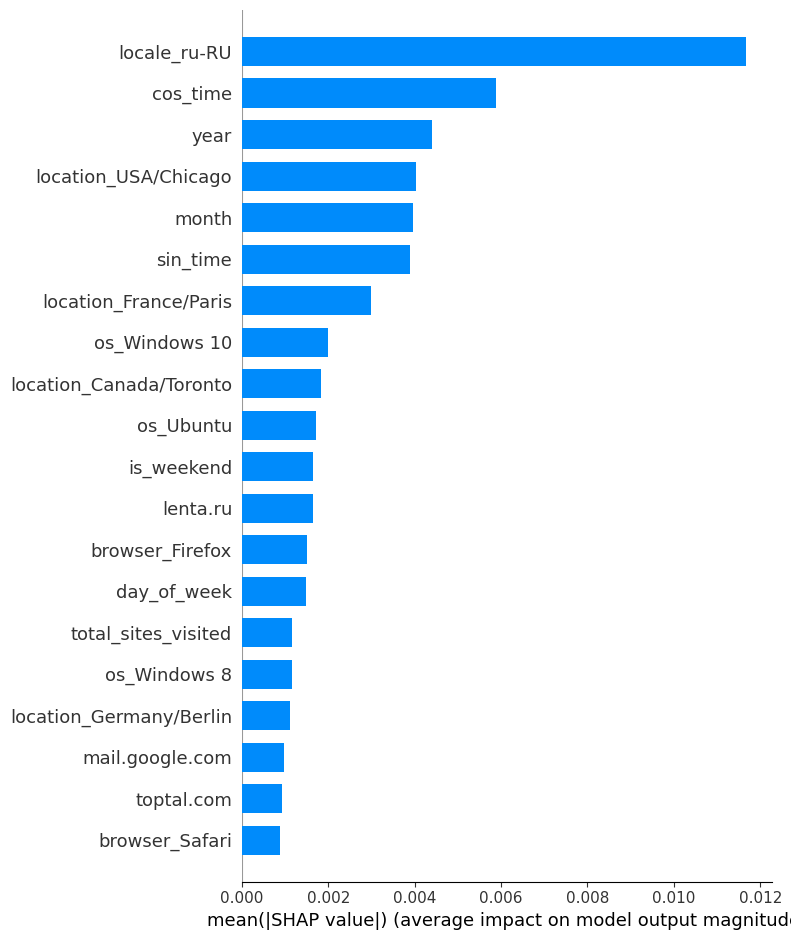

In [ ]:
# !pip install shap
import shap

# Obtain information about feature importance
explainer = shap.Explainer(model.predict, X_train)
sample_indices = np.random.choice(X_test.shape[0], 1000, replace=False)
X_test_sample = X_test.iloc[sample_indices]
shap_values = explainer.shap_values(X_test_sample)
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=X.columns)

From features importance plot it was clear that some characteristics **connected to locale, location, year and month, and time** were essential for forecasting his behavior, while other features, such as the operating system and frequently visited websites, were deemed less significant.

The feature importance analysis's emphasis on **locale and location** **aligns with my early EDA insights**. I was right to assume that Waldo's distinct location and use habits would be important factors in his identification. Additionally, my prediction regarding the** average influence of the operating system was confirmed**.

However, I initially **underestimated the importance features connected to date and time**. It emerged that Waldo's behavior strongly correlates with the year, month, and session initiation time. Surprisingly, Waldo's **most visited sites had a lesser impact** on correct, contrary to my initial expectations.

Overall, the feature importance analysis yielded insightful information about the traits most representative of Waldo's identity or behavior. **Although some aspects, like locale and location, were expected, other aspects, like the significance of date and time features, yielded unexpected results.**


## Evaluation

In [109]:
# Save prediction results to file
y_pred_verify = model.predict(verify_data)
y_pred_verify = (y_pred_verify >= best_threshold).astype(bool)
y_pred_verify = [pred[0] for pred in y_pred_verify.tolist()]

with open('task_1_verify.json', 'r') as f:
    verify_file = json.load(f)

for record_idx in range(len(verify_file)):
    verify_file[record_idx]['is_waldo'] = y_pred_verify[record_idx]

with open('task_1_verify.json', 'w') as f:
    json.dump(verify_file, f)

waldo_count = y_pred_verify.count(True)
print("Number of Waldo found:", waldo_count)

1250/1250 [==============================] - 3s 2ms/step
Number of Waldo found: 170
